<h1 style='text-align:center'>American Express- Default Prediction</h1>

In [416]:
import warnings
warnings.filterwarnings("ignore")
import os

In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [200]:
train_data = pd.read_csv('train_data.csv', nrows=50000)
train_labels = pd.read_csv('train_labels.csv')

In [201]:
train_data

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,D_49,B_6,B_7,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,D_53,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,D_56,B_13,R_5,D_58,S_9,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_63,D_64,D_65,B_16,B_17,B_18,B_19,D_66,B_20,D_68,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,D_73,P_4,D_74,D_75,D_76,B_24,R_7,D_77,B_25,B_26,D_78,D_79,R_8,R_9,S_16,D_80,R_10,R_11,B_27,D_81,D_82,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_29,B_30,S_18,D_86,D_87,R_17,R_18,D_88,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_105,D_106,D_107,B_36,B_37,R_26,R_27,B_38,D_108,D_109,D_110,D_111,B_39,D_112,B_40,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,B_42,D_130,D_131,D_132,D_133,R_28,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,NaN,NaN,0.000630,0.080986,0.708906,0.170600,0.006204,0.358587,0.525351,0.255736,NaN,0.063902,0.059416,0.006466,0.148698,1.335856,0.008207,0.001423,0.207334,0.736463,0.096219,NaN,0.023381,0.002768,0.008322,1.001519,0.008298,0.161345,0.148266,0.922998,0.354596,0.152025,0.118075,0.001882,0.158612,0.065728,0.018385,0.063646,0.199617,0.308233,0.016361,0.401619,0.091071,CR,O,0.007126,0.007665,NaN,0.652984,0.008520,NaN,0.004730,6.0,0.272008,0.008363,0.515222,0.002644,0.009013,0.004808,0.008342,0.119403,0.004802,0.108271,0.050882,NaN,0.007554,0.080422,0.069067,NaN,0.004327,0.007562,NaN,0.007729,0.000272,0.001576,0.004239,0.001434,NaN,0.002271,0.004061,0.007121,0.002456,0.002310,0.003532,0.506612,0.008033,1.009825,0.084683,0.003820,0.007043,0.000438,0.006452,0.000830,0.005055,NaN,0.0,0.005720,0.007084,NaN,0.000198,0.008907,NaN,1,0.002537,0.005177,0.006626,0.009705,0.007782,0.002450,1.001101,0.002665,0.007479,0.006893,1.503673,1.006133,0.003569,0.008871,0.003950,0.003647,0.004950,0.894090,0.135561,0.911191,0.974539,0.001243,0.766688,1.008691,1.004587,0.893734,NaN,0.670041,0.009968,0.004572,NaN,1.008949,2.0,NaN,0.004326,NaN,NaN,NaN,1.007336,0.210060,0.676922,0.007871,1.0,0.238250,0.0,4.0,0.232120,0.236266,0.0,0.702280,0.434345,0.003057,0.686516,0.008740,1.0,1.003319,1.007819,1.000080,0.006805,NaN,0.002052,0.005972,NaN,0.004345,0.001535,NaN,NaN,NaN,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,NaN,NaN,0.002526,0.069419,0.712795,0.113239,0.006206,0.353630,0.521311,0.223329,NaN,0.065261,0.057744,0.001614,0.149723,1.339794,0.008373,0.001984,0.202778,0.720886,0.099804,NaN,0.030599,0.002749,0.002482,1.009033,0.005136,0.140951,0.143530,0.919414,0.326757,0.156201,0.118737,0.001610,0.148459,0.093935,0.013035,0.065501,0.151387,0.265026,0.017688,0.406326,0.086805,CR,O,0.002413,0.007148,NaN,0.647093,0.002238,NaN,0.003879,6.0,0.188970,0.004030,0.509048,0.004193,0.007842,0.001283,0.006524,0.140611,0.000094,0.101018,0.040469,NaN,0.004832,0.081413,0.074166,NaN,0.004203,0.005304,NaN,0.001864,0.000979,0.009896,0.007597,0.000509,NaN,0.009810,0.000127,0.005966,0.000395,0.001327,0.007773,0.500855,0.000760,1.009461,0.081843,0.000347,0.007789,0.004311,0.002332,0.009469,0.003753,NaN,0.0,0.007584,0.006677,NaN,0.001142,0.005907,NaN,1,0.008427,0.008979,0.001854,0.009924,0.005987,0.002247,1.006779,0.002508,0.006827,0.002837,1.503577,1.005791,0.000571,0.000391,0.008351,0.008850,0.003180,0.902135,0.136333,0.919876,0.975624,0.004561,0.786007,1.000084,1.004118,0.906841,NaN,0.668647,0.003921,0.004654,NaN,1.003205,2.0,NaN,0.008707,NaN,NaN,NaN,1.007653,0.184093,0.822281,0.003444,1.0,0.247217,0.0,4.0,0.243532,0.241885,0.0,0.707017,0.430501,0.001306,0.686414,0.000755,1.0,1.008394,1.004333,1.008344,0.004407,NaN,0.001034,0.004838,NaN,0.

In [202]:
train_labels

,customer_ID,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0
...,...,...
458908,ffff41c8a52833b56430603969b9ca48d208e7c192c6a4...,0
458909,ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fd...,0
458910,ffff9984b999fccb2b6127635ed0736dda94e544e67e02...,0
458911,ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...,1


In [203]:
# merging the two dataframes based on the customer id
df = pd.merge(train_data, train_labels, how='inner', left_on=['customer_ID'], right_on=['customer_ID'])
df

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,D_49,B_6,B_7,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,D_53,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,D_56,B_13,R_5,D_58,S_9,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_63,D_64,D_65,B_16,B_17,B_18,B_19,D_66,B_20,D_68,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,D_73,P_4,D_74,D_75,D_76,B_24,R_7,D_77,B_25,B_26,D_78,D_79,R_8,R_9,S_16,D_80,R_10,R_11,B_27,D_81,D_82,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_29,B_30,S_18,D_86,D_87,R_17,R_18,D_88,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_105,D_106,D_107,B_36,B_37,R_26,R_27,B_38,D_108,D_109,D_110,D_111,B_39,D_112,B_40,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,B_42,D_130,D_131,D_132,D_133,R_28,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,NaN,NaN,0.000630,0.080986,0.708906,0.170600,0.006204,0.358587,0.525351,0.255736,NaN,0.063902,0.059416,0.006466,0.148698,1.335856,0.008207,0.001423,0.207334,0.736463,0.096219,NaN,0.023381,0.002768,0.008322,1.001519,0.008298,0.161345,0.148266,0.922998,0.354596,0.152025,0.118075,0.001882,0.158612,0.065728,0.018385,0.063646,0.199617,0.308233,0.016361,0.401619,0.091071,CR,O,0.007126,0.007665,NaN,0.652984,0.008520,NaN,0.004730,6.0,0.272008,0.008363,0.515222,0.002644,0.009013,0.004808,0.008342,0.119403,0.004802,0.108271,0.050882,NaN,0.007554,0.080422,0.069067,NaN,0.004327,0.007562,NaN,0.007729,0.000272,0.001576,0.004239,0.001434,NaN,0.002271,0.004061,0.007121,0.002456,0.002310,0.003532,0.506612,0.008033,1.009825,0.084683,0.003820,0.007043,0.000438,0.006452,0.000830,0.005055,NaN,0.0,0.005720,0.007084,NaN,0.000198,0.008907,NaN,1,0.002537,0.005177,0.006626,0.009705,0.007782,0.002450,1.001101,0.002665,0.007479,0.006893,1.503673,1.006133,0.003569,0.008871,0.003950,0.003647,0.004950,0.894090,0.135561,0.911191,0.974539,0.001243,0.766688,1.008691,1.004587,0.893734,NaN,0.670041,0.009968,0.004572,NaN,1.008949,2.0,NaN,0.004326,NaN,NaN,NaN,1.007336,0.210060,0.676922,0.007871,1.0,0.238250,0.0,4.0,0.232120,0.236266,0.0,0.702280,0.434345,0.003057,0.686516,0.008740,1.0,1.003319,1.007819,1.000080,0.006805,NaN,0.002052,0.005972,NaN,0.004345,0.001535,NaN,NaN,NaN,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,NaN,NaN,0.002526,0.069419,0.712795,0.113239,0.006206,0.353630,0.521311,0.223329,NaN,0.065261,0.057744,0.001614,0.149723,1.339794,0.008373,0.001984,0.202778,0.720886,0.099804,NaN,0.030599,0.002749,0.002482,1.009033,0.005136,0.140951,0.143530,0.919414,0.326757,0.156201,0.118737,0.001610,0.148459,0.093935,0.013035,0.065501,0.151387,0.265026,0.017688,0.406326,0.086805,CR,O,0.002413,0.007148,NaN,0.647093,0.002238,NaN,0.003879,6.0,0.188970,0.004030,0.509048,0.004193,0.007842,0.001283,0.006524,0.140611,0.000094,0.101018,0.040469,NaN,0.004832,0.081413,0.074166,NaN,0.004203,0.005304,NaN,0.001864,0.000979,0.009896,0.007597,0.000509,NaN,0.009810,0.000127,0.005966,0.000395,0.001327,0.007773,0.500855,0.000760,1.009461,0.081843,0.000347,0.007789,0.004311,0.002332,0.009469,0.003753,NaN,0.0,0.007584,0.006677,NaN,0.001142,0.005907,NaN,1,0.008427,0.008979,0.001854,0.009924,0.005987,0.002247,1.006779,0.002508,0.006827,0.002837,1.503577,1.005791,0.000571,0.000391,0.008351,0.008850,0.003180,0.902135,0.136333,0.919876,0.975624,0.004561,0.786007,1.000084,1.004118,0.906841,NaN,0.668647,0.003921,0.004654,NaN,1.003205,2.0,NaN,0.008707,NaN,NaN,NaN,1.007653,0.184093,0.822281,0.003444,1.0,0.247217,0.0,4.0,0.243532,0.241885,0.0,0.707017,0.430501,0.001306,0.686414,0.000755,1.0,1.008394,1.004333,1.008344,0.004407,NaN,0.001034,0.0048

In [204]:
pd.set_option('display.max_columns', None)
# for each column in the dataframe print the number of null values
for column in df.columns:
    print(column, " - ", df[column].isnull().sum())

customer_ID  -  0
S_2  -  0
P_2  -  392
D_39  -  0
B_1  -  0
B_2  -  14
R_1  -  0
S_3  -  9743
D_41  -  14
B_3  -  14
D_42  -  42963
D_43  -  15378
D_44  -  2536
B_4  -  0
D_45  -  14
B_5  -  0
R_2  -  0
D_46  -  11078
D_47  -  0
D_48  -  6451
D_49  -  44662
B_6  -  2
B_7  -  0
B_8  -  249
D_50  -  28656
D_51  -  0
B_9  -  0
R_3  -  0
D_52  -  233
P_3  -  2670
B_10  -  0
D_53  -  37210
S_5  -  0
B_11  -  0
S_6  -  0
D_54  -  14
R_4  -  0
S_7  -  9743
B_12  -  0
S_8  -  0
D_55  -  1590
D_56  -  27207
B_13  -  441
R_5  -  0
D_58  -  0
S_9  -  26464
B_14  -  0
D_59  -  896
D_60  -  0
D_61  -  5344
B_15  -  29
S_11  -  0
D_62  -  6858
D_63  -  0
D_64  -  1918
D_65  -  0
B_16  -  14
B_17  -  28203
B_18  -  0
B_19  -  14
D_66  -  44566
B_20  -  14
D_68  -  1884
S_12  -  0
R_6  -  0
S_13  -  0
B_21  -  0
D_69  -  1677
B_22  -  14
D_70  -  814
D_71  -  0
D_72  -  175
S_15  -  0
B_23  -  0
D_73  -  49438
P_4  -  0
D_74  -  159
D_75  -  0
D_76  -  44068
B_24  -  0
R_7  -  0
D_77  -  22728
B_25  

In [205]:
pd.reset_option('display.max_rows')

In [206]:
df.describe()

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,D_49,B_6,B_7,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,D_53,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,D_56,B_13,R_5,D_58,S_9,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_65,B_16,B_17,B_18,B_19,D_66,B_20,D_68,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,D_73,P_4,D_74,D_75,D_76,B_24,R_7,D_77,B_25,B_26,D_78,D_79,R_8,R_9,S_16,D_80,R_10,R_11,B_27,D_81,D_82,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_29,B_30,S_18,D_86,D_87,R_17,R_18,D_88,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_105,D_106,D_107,B_36,B_37,R_26,R_27,B_38,D_108,D_109,D_110,D_111,B_39,D_112,B_40,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,B_42,D_130,D_131,D_132,D_133,R_28,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
count,49608.000000,5.000000e+04,50000.000000,49986.000000,5.000000e+04,40257.000000,4.998600e+04,49986.000000,7037.000000,34622.000000,4.746400e+04,5.000000e+04,49986.000000,5.000000e+04,5.000000e+04,38922.000000,50000.000000,43549.000000,5338.000000,49998.000000,50000.000000,4.975100e+04,21344.000000,5.000000e+04,5.000000e+04,5.000000e+04,49767.000000,47330.000000,50000.000000,1.279000e+04,50000.000000,5.000000e+04,5.000000e+04,49986.000000,5.000000e+04,40257.000000,50000.000000,50000.000000,48410.000000,22793.000000,4.955900e+04,5.000000e+04,5.000000e+04,23536.000000,50000.000000,49104.000000,50000.000000,44656.000000,49971.000000,50000.000000,43142.000000,5.000000e+04,4.998600e+04,21797.000000,50000.000000,4.998600e+04,5434.000000,4.998600e+04,48116.000000,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,4.832300e+04,4.998600e+04,4.918600e+04,50000.000000,4.982500e+04,50000.000000,50000.000000,562.000000,5.000000e+04,49841.000000,5.000000e+04,5932.000000,5.000000e+04,5.000000e+04,27272.000000,49971.000000,4.998600e+04,4.746400e+04,4.937700e+04,5.000000e+04,3.060000e+03,5.000000e+04,4.984100e+04,5.000000e+04,5.000000e+04,4.998600e+04,4.979100e+04,1.338800e+04,5.000000e+04,50000.000000,50000.000000,5.000000e+04,4.832300e+04,5.000000e+04,5.000000e+04,4.976700e+04,5.000000e+04,3561.000000,49986.000000,5.000000e+04,5.000000e+04,37.0,5.000000e+04,5.000000e+04,70.000000,50000.00000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,4.999700e+04,5.000000e+04,4.998600e+04,4.976700e+04,5.000000e+04,5.000000e+04,4.863100e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,49825.000000,49997.000000,49828.000000,49895.000000,4.999300e+04,4.965900e+04,4.913200e+04,4.913200e+04,22473.000000,5293.000000,4.913200e+04,5.000000e+04,50000.000000,5437.000000,48857.000000,49986.000000,282.000000,4.998400e+04,353.000000,353.000000,369.000000,49979.000000,5.000000e+04,3.697300e+04,4.847200e+04,48472.000000,48472.000000,48472.000000,48472.000000,48472.000000,48472.000000,48472.000000,48472.000000,48472.000000,4.847200e+04,48472.000000,4.847200e+04,48981.000000,5.000000e+04,4.913200e+04,49132.000000,4.999300e+04,673.000000,4.913200e+04,4.913200e+04,5303.000000,4.964700e+04,5.000000e+04,1948.000000,1948.000000,1948.000000,1948.000000,1948.000000,4.913200e+04,4.965900e+04,4.913200e+04,8141.000000,4.913200e+04,4.965900e+04,4.913200e+04,50000.000000
mean,0.658349,1.515275e-01,0.127074,0.617718,7.833584e-02,0.225655,5.880835e-02,0.133463,0.182291,0.161006,1.179522e-01,1.712006e-01,0.254594,8.120011e-02,4.810335e-02,0.473982,0.411062,0.380980,0.174878,0.148512,0.186807,4.461704e-01,0.169041,1.504396e-01,1.919584e-01,1.215300e-01,0.184277,0.600343,0.223476,7.460105e-02,0.084818,1.142657e-01,2.544353e-01,0.984021,3.120533e-02,0.222476,0.090943,0.327683,0.297116,0.205649,1.011554e-01,3.458788e-02,2.120779e-01,0.077808,0.103583,0.365226,0.377449,0.429974,0.054468,0.380204,0.192638,3.797963e-02,3.535717e-01,0.713598,0.596740,1.574784e-01,0.991903,2.389202e-01,5.020991,0.239345,5.603698e-02,

In [207]:
rows = df.shape[0]
columns = df.shape[1]

print(f'Number of rows: {rows}')
print(f'Number of columns: {columns}')

Number of rows: 50000
Number of columns: 191


In [208]:
df.dtypes

customer_ID     object
S_2             object
P_2            float64
D_39           float64
B_1            float64
                ...   
D_142          float64
D_143          float64
D_144          float64
D_145          float64
target           int64
Length: 191, dtype: object

## Pandas Profiling

In [209]:
# # performing pandas profiling
# from pandas_profiling import ProfileReport
# profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)
# profile.to_file("pandas_profile.html")

Pandas profiling was not supported for Python 3.12.4

## Sweetviz Analysis

In [210]:
import sweetviz as sv

report = sv.analyze(df)
report.show_html('sweetviz_report.html')

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:42 -> (00:00 left)


Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Handling Missing Values

In [211]:
# dropping the columns which have more than 75% of the values as null values
excess = df.isnull().mean() > 0.75
df.drop(df.columns[excess], axis=1, inplace=True)
df

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,B_6,B_7,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,D_53,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,D_56,B_13,R_5,D_58,S_9,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_63,D_64,D_65,B_16,B_17,B_18,B_19,B_20,D_68,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,P_4,D_74,D_75,B_24,R_7,D_77,B_25,B_26,D_78,D_79,R_8,S_16,D_80,R_10,R_11,B_27,D_81,D_82,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_30,S_18,D_86,R_17,R_18,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_105,D_107,B_36,B_37,R_27,B_38,D_109,D_112,B_40,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,D_130,D_131,D_133,R_28,D_139,D_140,D_141,D_143,D_144,D_145,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,NaN,0.000630,0.080986,0.708906,0.170600,0.006204,0.358587,0.525351,0.255736,0.063902,0.059416,0.006466,0.148698,1.335856,0.008207,0.001423,0.207334,0.736463,0.096219,NaN,0.023381,0.002768,0.008322,1.001519,0.008298,0.161345,0.148266,0.922998,0.354596,0.152025,0.118075,0.001882,0.158612,0.065728,0.018385,0.063646,0.199617,0.308233,0.016361,0.401619,0.091071,CR,O,0.007126,0.007665,NaN,0.652984,0.008520,0.004730,6.0,0.272008,0.008363,0.515222,0.002644,0.009013,0.004808,0.008342,0.119403,0.004802,0.108271,0.050882,0.007554,0.080422,0.069067,0.004327,0.007562,NaN,0.007729,0.000272,0.001576,0.004239,0.001434,0.002271,0.004061,0.007121,0.002456,0.002310,0.003532,0.506612,0.008033,1.009825,0.084683,0.003820,0.007043,0.000438,0.006452,0.000830,0.005055,0.0,0.005720,0.007084,0.000198,0.008907,1,0.002537,0.005177,0.006626,0.009705,0.007782,0.002450,1.001101,0.002665,0.007479,0.006893,1.503673,1.006133,0.003569,0.008871,0.003950,0.003647,0.004950,0.894090,0.135561,0.911191,0.974539,0.001243,0.766688,1.008691,1.004587,0.893734,0.670041,0.009968,0.004572,1.008949,2.0,0.004326,1.007336,0.210060,0.676922,0.007871,1.0,0.238250,0.0,4.0,0.232120,0.236266,0.0,0.702280,0.434345,0.003057,0.686516,0.008740,1.0,1.003319,1.007819,1.000080,0.006805,0.002052,0.005972,0.004345,0.001535,0.002427,0.003706,0.003818,0.000569,0.000610,0.002674,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,NaN,0.002526,0.069419,0.712795,0.113239,0.006206,0.353630,0.521311,0.223329,0.065261,0.057744,0.001614,0.149723,1.339794,0.008373,0.001984,0.202778,0.720886,0.099804,NaN,0.030599,0.002749,0.002482,1.009033,0.005136,0.140951,0.143530,0.919414,0.326757,0.156201,0.118737,0.001610,0.148459,0.093935,0.013035,0.065501,0.151387,0.265026,0.017688,0.406326,0.086805,CR,O,0.002413,0.007148,NaN,0.647093,0.002238,0.003879,6.0,0.188970,0.004030,0.509048,0.004193,0.007842,0.001283,0.006524,0.140611,0.000094,0.101018,0.040469,0.004832,0.081413,0.074166,0.004203,0.005304,NaN,0.001864,0.000979,0.009896,0.007597,0.000509,0.009810,0.000127,0.005966,0.000395,0.001327,0.007773,0.500855,0.000760,1.009461,0.081843,0.000347,0.007789,0.004311,0.002332,0.009469,0.003753,0.0,0.007584,0.006677,0.001142,0.005907,1,0.008427,0.008979,0.001854,0.009924,0.005987,0.002247,1.006779,0.002508,0.006827,0.002837,1.503577,1.005791,0.000571,0.000391,0.008351,0.008850,0.003180,0.902135,0.136333,0.919876,0.975624,0.004561,0.786007,1.000084,1.004118,0.906841,0.668647,0.003921,0.004654,1.003205,2.0,0.008707,1.007653,0.184093,0.822281,0.003444,1.0,0.247217,0.0,4.0,0.243532,0.241885,0.0,0.707017,0.430501,0.001306,0.686414,0.000755,1.0,1.008394,1.004333,1.008344,0.004407,0.001034,0.004838,0.007495,0.004931,0.003954,0.003167,0.005032,0.009576,0.005492,0.009217,0
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,NaN,0.007605,0.068839,0.720884,0.060492,0.003259,0.334650,0.524568,0.

## Checking for outliers in the columns

In [212]:
# defining a method to detect outliers using the z-score method and convert them to null values
def detect_outliers(df):
    from scipy import stats
    for column in df.select_dtypes(include=[np.number]).columns:
        z = np.abs(stats.zscore(df[column]))
        df[column] = np.where(z > 3, np.nan, df[column])
    return df

# detecting outliers in the dataframe
df = detect_outliers(df)

In [213]:
df

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,B_6,B_7,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,D_53,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,D_56,B_13,R_5,D_58,S_9,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_63,D_64,D_65,B_16,B_17,B_18,B_19,B_20,D_68,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,P_4,D_74,D_75,B_24,R_7,D_77,B_25,B_26,D_78,D_79,R_8,S_16,D_80,R_10,R_11,B_27,D_81,D_82,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_30,S_18,D_86,R_17,R_18,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_105,D_107,B_36,B_37,R_27,B_38,D_109,D_112,B_40,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,D_130,D_131,D_133,R_28,D_139,D_140,D_141,D_143,D_144,D_145,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,NaN,0.000630,0.080986,0.708906,0.170600,0.006204,0.358587,0.525351,0.255736,0.063902,0.059416,0.006466,0.148698,NaN,0.008207,0.001423,0.207334,0.736463,0.096219,NaN,0.023381,0.002768,0.008322,1.001519,0.008298,0.161345,0.148266,0.922998,0.354596,0.152025,0.118075,0.001882,0.158612,0.065728,0.018385,0.063646,0.199617,0.308233,0.016361,0.401619,0.091071,CR,O,0.007126,0.007665,NaN,0.652984,0.008520,0.004730,6.0,0.272008,0.008363,0.515222,0.002644,0.009013,0.004808,0.008342,0.119403,0.004802,0.108271,0.050882,0.007554,0.080422,0.069067,0.004327,0.007562,NaN,0.007729,0.000272,0.001576,0.004239,0.001434,0.002271,0.004061,0.007121,0.002456,0.002310,0.003532,0.506612,0.008033,1.009825,0.084683,0.003820,0.007043,0.000438,0.006452,0.000830,0.005055,0.0,0.005720,0.007084,0.000198,0.008907,1.0,0.002537,0.005177,0.006626,0.009705,0.007782,0.002450,1.001101,0.002665,0.007479,0.006893,1.503673,NaN,0.003569,0.008871,0.003950,0.003647,0.004950,0.894090,0.135561,0.911191,0.974539,0.001243,0.766688,1.008691,1.004587,0.893734,0.670041,0.009968,0.004572,1.008949,2.0,0.004326,1.007336,0.210060,0.676922,0.007871,1.0,0.238250,0.0,4.0,0.232120,0.236266,0.0,0.702280,0.434345,0.003057,0.686516,0.008740,1.0,1.003319,1.007819,1.000080,0.006805,0.002052,0.005972,0.004345,0.001535,0.002427,0.003706,0.003818,0.000569,0.000610,0.002674,0.0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,NaN,0.002526,0.069419,0.712795,0.113239,0.006206,0.353630,0.521311,0.223329,0.065261,0.057744,0.001614,0.149723,NaN,0.008373,0.001984,0.202778,0.720886,0.099804,NaN,0.030599,0.002749,0.002482,1.009033,0.005136,0.140951,0.143530,0.919414,0.326757,0.156201,0.118737,0.001610,0.148459,0.093935,0.013035,0.065501,0.151387,0.265026,0.017688,0.406326,0.086805,CR,O,0.002413,0.007148,NaN,0.647093,0.002238,0.003879,6.0,0.188970,0.004030,0.509048,0.004193,0.007842,0.001283,0.006524,0.140611,0.000094,0.101018,0.040469,0.004832,0.081413,0.074166,0.004203,0.005304,NaN,0.001864,0.000979,0.009896,0.007597,0.000509,0.009810,0.000127,0.005966,0.000395,0.001327,0.007773,0.500855,0.000760,1.009461,0.081843,0.000347,0.007789,0.004311,0.002332,0.009469,0.003753,0.0,0.007584,0.006677,0.001142,0.005907,1.0,0.008427,0.008979,0.001854,0.009924,0.005987,0.002247,1.006779,0.002508,0.006827,0.002837,1.503577,NaN,0.000571,0.000391,0.008351,0.008850,0.003180,0.902135,0.136333,0.919876,0.975624,0.004561,0.786007,1.000084,1.004118,0.906841,0.668647,0.003921,0.004654,1.003205,2.0,0.008707,1.007653,0.184093,0.822281,0.003444,1.0,0.247217,0.0,4.0,0.243532,0.241885,0.0,0.707017,0.430501,0.001306,0.686414,0.000755,1.0,1.008394,1.004333,1.008344,0.004407,0.001034,0.004838,0.007495,0.004931,0.003954,0.003167,0.005032,0.009576,0.005492,0.009217,0.0
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,NaN,0.007605,0.068839,0.720884,0.060492,0.003259,0.334650,0.524568,0.189424,0.066

Removing outliers using the Inter Quartile Range method reduces a large amount of records from the dataframe. 50000 records are reduced to 168 records. This is a massive loss in data quantity. So the outliers have been retained.

## Distribution of target column classes

In [214]:
# finding the occurence of each value in the target variable
df['target'].value_counts()

target
0.0    37049
1.0    12951
Name: count, dtype: int64

In [215]:
# checking the class distribution in target column and displaying as percentage
class_distribution = df['target'].value_counts(normalize=True)
class_distribution

target
0.0    0.74098
1.0    0.25902
Name: proportion, dtype: float64

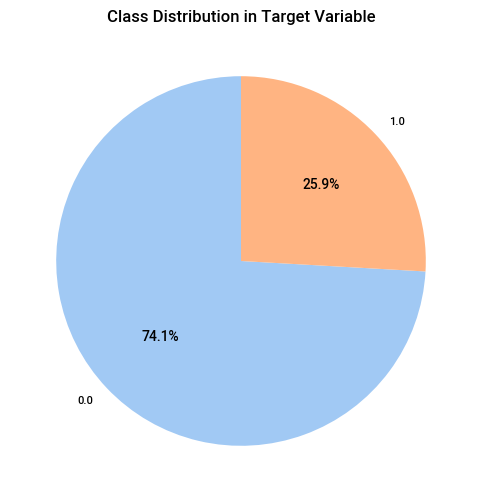

In [216]:
# displaying this in a pie chart
palette = sns.color_palette("pastel")
plt.figure(figsize=(10, 6))
plt.pie(class_distribution, labels=class_distribution.index, autopct='%1.1f%%', startangle=90, colors=palette)
plt.title('Class Distribution in Target Variable')
plt.show()

Shows a severe imbalance between the two classes in the target column of the dataset.

In [217]:
# selecting all the integer columns
int_cols = df.dtypes == int
df_int = df.columns[int_cols]
df_int

Index([], dtype='object')

In [218]:
# selecting all the float columns
float_cols = df.dtypes == float
df_float = df.columns[float_cols]
df_float

Index(['P_2', 'D_39', 'B_1', 'B_2', 'R_1', 'S_3', 'D_41', 'B_3', 'D_43',
       'D_44',
       ...
       'D_131', 'D_133', 'R_28', 'D_139', 'D_140', 'D_141', 'D_143', 'D_144',
       'D_145', 'target'],
      dtype='object', length=164)

In [219]:
# # selecting the top 10 columns with the highest correlation with the target variable
# corr = df[df_float].corrwith(df.target)
# corr = corr.abs()
# corr.sort_values(inplace=True, ascending=False)
# corr[:10]

In [220]:
# high_corr = corr[:10].index
# high_corr  = list(high_corr)
# high_corr.append('target')

In [221]:
# drawing pair plot for these columns
# sns.pairplot(df[high_corr], hue='target')

In [222]:
# 
mask = df.dtypes == object
mask['customer_ID'] = False
df_cat = df.columns[mask]
print(df_cat)

Index(['S_2', 'D_63', 'D_64'], dtype='object')


## One Hot encoding

In [223]:
# Determine how many extra columns would be created
num_ohc_cols = (df[df_cat].apply(lambda x: x.nunique()).sort_values(ascending=False))

# No need to encode if there is only one value
small_num_ohc_cols = num_ohc_cols.loc[num_ohc_cols>1]

# Number of one-hot columns is one less than the number of categories
small_num_ohc_cols -= 1

small_num_ohc_cols.sum()

403

In [224]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# creating instances of the encoders
le = LabelEncoder()
ohc = OneHotEncoder()

for col in num_ohc_cols.index:
    # integer encoding the string categories
    dat = le.fit_transform(df[col]).astype(np.int32)
    # reshaping the data
    new_dat = ohc.fit_transform(dat.reshape(-1,1))

    # creating unique column names
    n_cols = new_dat.shape[1]
    # creating unique column names
    col_names = ['_'.join([col, str(x)]) for x in range(n_cols)]

    # creating the new DataFrame
    new_df = pd.DataFrame(new_dat.toarray(), index=df.index, columns=col_names)
    
    # adding the new DataFrame to the original one
    df = pd.concat([df, new_df], axis=1)

    # Drop the original column
    df = df.drop(col, axis=1)

In [225]:
df.head()

,customer_ID,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,B_6,B_7,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,D_53,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,D_56,B_13,R_5,D_58,S_9,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_65,B_16,B_17,B_18,B_19,B_20,D_68,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,P_4,D_74,D_75,B_24,R_7,D_77,B_25,B_26,D_78,D_79,R_8,S_16,D_80,R_10,R_11,B_27,D_81,D_82,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_30,S_18,D_86,R_17,R_18,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_105,D_107,B_36,B_37,R_27,B_38,D_109,D_112,B_40,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,D_130,D_131,D_133,R_28,D_139,D_140,D_141,D_143,D_144,D_145,target,S_2_0,S_2_1,S_2_2,S_2_3,S_2_4,S_2_5,S_2_6,S_2_7,S_2_8,S_2_9,S_2_10,S_2_11,S_2_12,S_2_13,S_2_14,S_2_15,S_2_16,S_2_17,S_2_18,S_2_19,S_2_20,S_2_21,S_2_22,S_2_23,S_2_24,S_2_25,S_2_26,S_2_27,S_2_28,S_2_29,S_2_30,S_2_31,S_2_32,S_2_33,S_2_34,S_2_35,S_2_36,S_2_37,S_2_38,S_2_39,S_2_40,S_2_41,S_2_42,S_2_43,S_2_44,S_2_45,S_2_46,S_2_47,S_2_48,S_2_49,S_2_50,S_2_51,S_2_52,S_2_53,S_2_54,S_2_55,S_2_56,S_2_57,S_2_58,S_2_59,S_2_60,S_2_61,S_2_62,S_2_63,S_2_64,S_2_65,S_2_66,S_2_67,S_2_68,S_2_69,S_2_70,S_2_71,S_2_72,S_2_73,S_2_74,S_2_75,S_2_76,S_2_77,S_2_78,S_2_79,S_2_80,S_2_81,S_2_82,S_2_83,S_2_84,S_2_85,S_2_86,S_2_87,S_2_88,S_2_89,S_2_90,S_2_91,S_2_92,S_2_93,S_2_94,S_2_95,S_2_96,S_2_97,S_2_98,S_2_99,S_2_100,S_2_101,S_2_102,S_2_103,S_2_104,S_2_105,S_2_106,S_2_107,S_2_108,S_2_109,S_2_110,S_2_111,S_2_112,S_2_113,S_2_114,S_2_115,S_2_116,S_2_117,S_2_118,S_2_119,S_2_120,S_2_121,S_2_122,S_2_123,S_2_124,S_2_125,S_2_126,S_2_127,S_2_128,S_2_129,S_2_130,S_2_131,S_2_132,S_2_133,S_2_134,S_2_135,S_2_136,S_2_137,S_2_138,S_2_139,S_2_140,S_2_141,S_2_142,S_2_143,S_2_144,S_2_145,S_2_146,S_2_147,S_2_148,S_2_149,S_2_150,S_2_151,S_2_152,S_2_153,S_2_154,S_2_155,S_2_156,S_2_157,S_2_158,S_2_159,S_2_160,S_2_161,S_2_162,S_2_163,S_2_164,S_2_165,S_2_166,S_2_167,S_2_168,S_2_169,S_2_170,S_2_171,S_2_172,S_2_173,S_2_174,S_2_175,S_2_176,S_2_177,S_2_178,S_2_179,S_2_180,S_2_181,S_2_182,S_2_183,S_2_184,S_2_185,S_2_186,S_2_187,S_2_188,S_2_189,S_2_190,S_2_191,S_2_192,S_2_193,S_2_194,S_2_195,S_2_196,S_2_197,S_2_198,S_2_199,S_2_200,S_2_201,S_2_202,S_2_203,S_2_204,S_2_205,S_2_206,S_2_207,S_2_208,S_2_209,S_2_210,S_2_211,S_2_212,S_2_213,S_2_214,S_2_215,S_2_216,S_2_217,S_2_218,S_2_219,S_2_220,S_2_221,S_2_222,S_2_223,S_2_224,S_2_225,S_2_226,S_2_227,S_2_228,S_2_229,S_2_230,S_2_231,S_2_232,S_2_233,S_2_234,S_2_235,S_2_236,S_2_237,S_2_238,S_2_239,S_2_240,S_2_241,S_2_242,S_2_243,S_2_244,S_2_245,S_2_246,S_2_247,S_2_248,S_2_249,S_2_250,S_2_251,S_2_252,S_2_253,S_2_254,S_2_255,S_2_256,S_2_257,S_2_258,S_2_259,S_2_260,S_2_261,S_2_262,S_2_263,S_2_264,S_2_265,S_2_266,S_2_267,S_2_268,S_2_269,S_2_270,S_2_271,S_2_272,S_2_273,S_2_274,S_2_275,S_2_276,S_2_277,S_2_278,S_2_279,S_2_280,S_2_281,S_2_282,S_2_283,S_2_284,S_2_285,S_2_286,S_2_287,S_2_288,S_2_289,S_2_290,S_2_291,S_2_292,S_2_293,S_2_294,S_2_295,S_2_296,S_2_297,S_2_298,S_2_299,S_2_300,S_2_301,S_2_302,S_2_303,S_2_304,S_2_305,S_2_306,S_2_307,S_2_308,S_2_309,S_2_310,S_2_311,S_2_312,S_2_313,S_2_314,S_2_315,S_2_316,S_2_317,S_2_318,S_2_319,S_2_320,S_2_321,S_2_322,S_2_323,S_2_324,S_2_325,S_2_326,S_2_327,S_2_328,S_2_329,S_2_330,S_2_331,S_2_332,S_2_333,S_2_334,S_2_335,S_2_336,S_2_337,S_2_338,S_2_339,S_2_340,S_2_341,S_2_342,S_2_343,S_2_344,S_2_345,S_2_346,S_2_347,S_2_348,S_2_349,S_2_350,S_2_351,S_2_352,S_2_353,S_2_354,S_2_355,S_2_356,S_2_357,S_2_358,S_2_359,S_2_360,S_2_361,S_2_362,S_2_363,S_2_364,S_2_365,S_2_366,S_2_367,S_2_368,S_2_369,S_2_370,S_2_371,S_2_372,S_2_373,S_2_374,S_2_375,S_2_376,S_2_377,S_2_378,S_2_379,S_2_380,S_2_381,S_2_382,S_2_383,S_2_384,S_2_385,S_2_386,S_2_387,S_2_388,S_2_389,S_2_390,S_2_391,S_2_392,S_2_393,S_2_394,S_2_395,D_63_0,D_63_1,D_63_2,D_63_3,D_63_4,D_63_5,D_64_0,D_64_1,D_64_2,D_64_3,D_64_4
0,0000099d6bd597052cdcd

## Imputation with mean

In [226]:
for col in df.columns:
    # if the column is in the integer or the float columns
    if col in df_int or col in df_float:
        # fill the null values with the mean of the column
        mean_value = df[col].mean()
        df[col].fillna(value=mean_value, inplace=True)

In [227]:
# checking the number of null values in the dataframe
df.isnull().sum()

customer_ID    0
P_2            0
D_39           0
B_1            0
B_2            0
              ..
D_64_0         0
D_64_1         0
D_64_2         0
D_64_3         0
D_64_4         0
Length: 572, dtype: int64

In [228]:
df.to_csv('cleaned_data.csv', index=False)

## MinMax Scaler

This scaling compresses all the inliers in the narrow range while maintaining the shape of the distribution.

In [229]:
from sklearn.preprocessing import MinMaxScaler

# creating an instance of the min max scaler
scaler = MinMaxScaler()
x = df.drop(['customer_ID', 'target'], axis=1) # defining the features
y = df['target'] # defining the target variable

x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns) # the features are scaled

### Splitting the data into training and testing

In [230]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1) # 20% dataset split for testing

In [231]:
# checking the dimensions of the four components
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((40000, 570), (10000, 570), (40000,), (10000,))

## Data Imbalance

Data imbalance can cause model performance to be biased. The classification on the majority class would be accurate but the performance on the minority class would be poor.

<Axes: xlabel='target'>

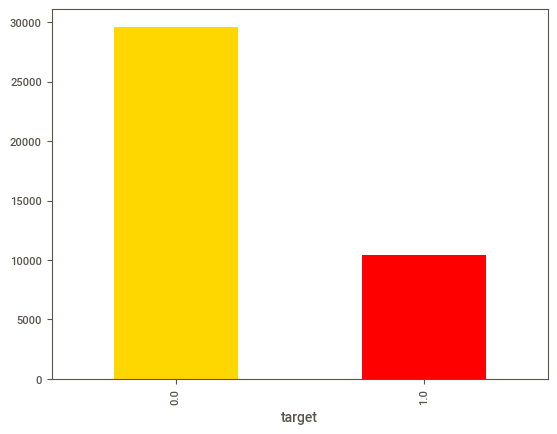

In [232]:
# checking the count of each class in the target variable
y_train.value_counts().plot.bar(color=['gold','red'])

Since there is a major imbalance between the classes in the target variable, we will have to use techniques to balance the two classes. We can train the models before SMOTE to see the performance.

## Model Training before SMOTE

In [233]:
# importing all the metrics for evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
# importing the classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

### Random Forest Classifier

In [234]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [235]:
train_accuracy = rf.score(x_train, y_train)
test_accuracy = rf.score(x_test, y_test)

print(f'Training Accuracy: {train_accuracy}')
print(f'Testing Accuracy: {test_accuracy}')

Training Accuracy: 1.0
Testing Accuracy: 0.9291


In [236]:
rf_initial_preds = rf.predict(x_test)

In [237]:
rf_initial_accuracy = accuracy_score(y_test, rf_initial_preds)
print(f'Accuracy: {rf_initial_accuracy}')

Accuracy: 0.9291


In [238]:
rf_initial_classification_report = classification_report(y_test, rf_initial_preds)
print(f'Classification Report: \n{rf_initial_classification_report}')

Classification Report: 
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.95      7432
         1.0       0.87      0.85      0.86      2568

    accuracy                           0.93     10000
   macro avg       0.91      0.90      0.91     10000
weighted avg       0.93      0.93      0.93     10000



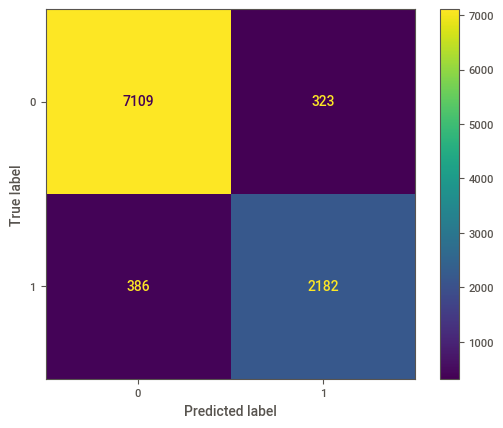

In [239]:
rf_initial_confusion_matrix = confusion_matrix(y_test, rf_initial_preds)
ConfusionMatrixDisplay(rf_initial_confusion_matrix).plot()

### Gradient Boosting Classifier

In [240]:
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)

GradientBoostingClassifier()

In [241]:
train_accuracy = gb.score(x_train, y_train)
test_accuracy = gb.score(x_test, y_test)

In [242]:
gb_initial_preds = gb.predict(x_test)

In [243]:
gb_initial_accuracy = accuracy_score(y_test, gb_initial_preds)
print(f'Accuracy: {gb_initial_accuracy}')

Accuracy: 0.8873


In [244]:
gb_initial_classification_report = classification_report(y_test, gb_initial_preds)
print(f'Classification Report: \n{gb_initial_classification_report}')

Classification Report: 
              precision    recall  f1-score   support

         0.0       0.92      0.93      0.92      7432
         1.0       0.78      0.78      0.78      2568

    accuracy                           0.89     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.89      0.89      0.89     10000



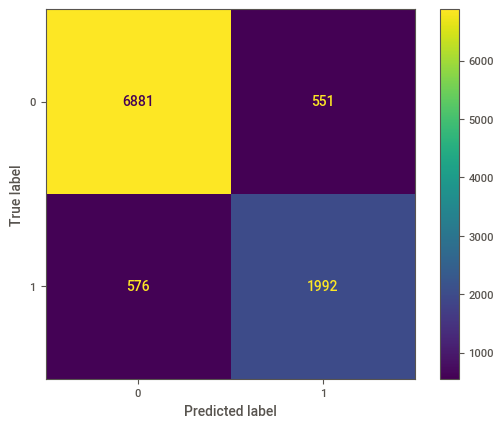

In [245]:
gb_initial_confusion_matrix = confusion_matrix(y_test, gb_initial_preds)
ConfusionMatrixDisplay(gb_initial_confusion_matrix).plot()

### AdaBoost Classifier

In [246]:
ab = AdaBoostClassifier()
ab.fit(x_train, y_train)

AdaBoostClassifier()

In [247]:
train_accuracy = ab.score(x_train, y_train)
test_accuracy = ab.score(x_test, y_test)

print(f'Training Accuracy: {train_accuracy}')
print(f'Testing Accuracy: {test_accuracy}')

Training Accuracy: 0.872075
Testing Accuracy: 0.8684


In [248]:
ab_intial_preds = ab.predict(x_test)

In [249]:
ab_initial_accuracy = accuracy_score(y_test, ab_intial_preds)
print(f'Accuracy: {ab_initial_accuracy}')

Accuracy: 0.8684


In [250]:
ab_initial_classification_report = classification_report(y_test, ab_intial_preds)
print(f'Classification Report: \n{ab_initial_classification_report}')

Classification Report: 
              precision    recall  f1-score   support

         0.0       0.91      0.92      0.91      7432
         1.0       0.75      0.73      0.74      2568

    accuracy                           0.87     10000
   macro avg       0.83      0.82      0.83     10000
weighted avg       0.87      0.87      0.87     10000



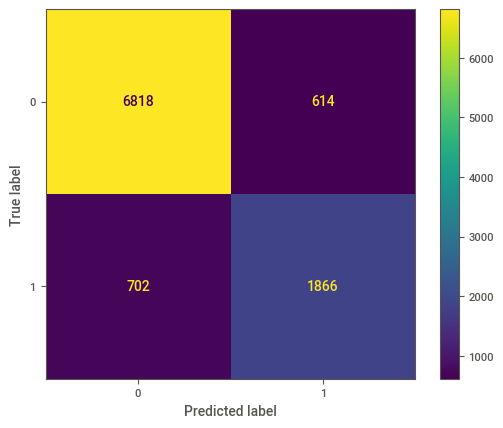

In [251]:
ab_initial_confusion_matrix = confusion_matrix(y_test, ab_intial_preds)
ConfusionMatrixDisplay(ab_initial_confusion_matrix).plot()

### XGBoost Classifier

In [252]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [253]:
train_accuracy = xgb.score(x_train, y_train)
test_accuracy = xgb.score(x_test, y_test)

print(f'Training Accuracy: {train_accuracy}')
print(f'Testing Accuracy: {test_accuracy}')

Training Accuracy: 0.9962
Testing Accuracy: 0.9506


In [254]:
xgb_initial_preds = xgb.predict(x_test)

In [255]:
xgb_initial_accuracy = accuracy_score(y_test, xgb_initial_preds)
print(f'Accuracy: {xgb_initial_accuracy}')

Accuracy: 0.9506


In [256]:
xgb_initial_classification_report = classification_report(y_test, xgb_initial_preds)
print(f'Classification Report: \n{xgb_initial_classification_report}')

Classification Report: 
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97      7432
         1.0       0.91      0.90      0.90      2568

    accuracy                           0.95     10000
   macro avg       0.94      0.93      0.94     10000
weighted avg       0.95      0.95      0.95     10000



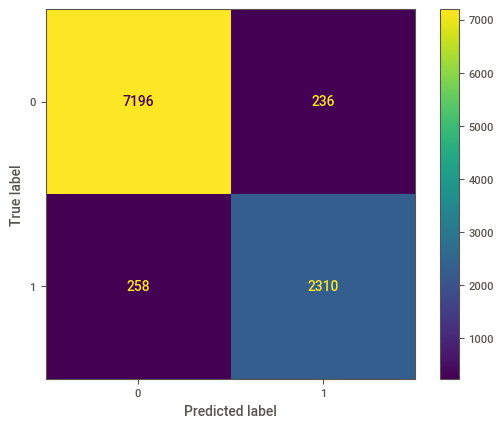

In [257]:
xgb_initial_confusion_matrix = confusion_matrix(y_test, xgb_initial_preds)
ConfusionMatrixDisplay(xgb_initial_confusion_matrix).plot()

### LightGBM Classifier

In [258]:
lgbm = LGBMClassifier()
lgbm.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 10383, number of negative: 29617
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017447 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 40125
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 569
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.259575 -> initscore=-1.048179
[LightGBM] [Info] Start training from score -1.048179


LGBMClassifier()

In [259]:
train_accuracy = lgbm.score(x_train, y_train)
test_accuracy = lgbm.score(x_test, y_test)

print(f'Training Accuracy: {train_accuracy}')
print(f'Testing Accuracy: {test_accuracy}')

Training Accuracy: 0.95905
Testing Accuracy: 0.9316


In [260]:
lgbm_initial_preds = lgbm.predict(x_test)

In [261]:
lgbm_initial_accuracy = accuracy_score(y_test, lgbm_initial_preds)
print(f'Accuracy: {lgbm_initial_accuracy}')

Accuracy: 0.9316


In [262]:
lgbm_initial_classification_report = classification_report(y_test, lgbm_initial_preds)
print(f'Classification Report: \n{lgbm_initial_classification_report}')

Classification Report: 
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95      7432
         1.0       0.87      0.87      0.87      2568

    accuracy                           0.93     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.93      0.93      0.93     10000



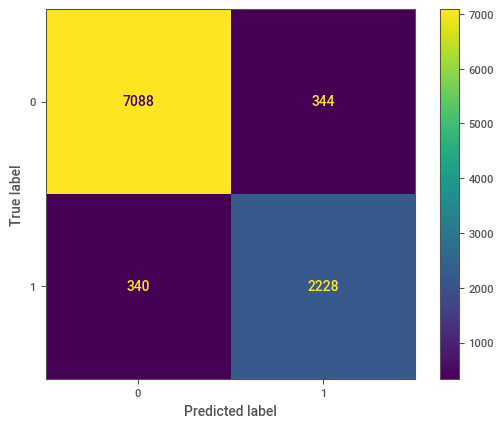

In [263]:
lgbm_initial_confusion_matrix = confusion_matrix(y_test, lgbm_initial_preds)
ConfusionMatrixDisplay(lgbm_initial_confusion_matrix).plot()

## Initial Model Evaluation

### General Evaluation

In [264]:
# adding all the evaluation metrics to a dataframe
accuracies = [rf_initial_accuracy, gb_initial_accuracy, ab_initial_accuracy, xgb_initial_accuracy, lgbm_initial_accuracy]
precision = [rf_initial_classification_report.split()[5], gb_initial_classification_report.split()[5], ab_initial_classification_report.split()[5], xgb_initial_classification_report.split()[5], lgbm_initial_classification_report.split()[5]]
recall = [rf_initial_classification_report.split()[6], gb_initial_classification_report.split()[6], ab_initial_classification_report.split()[6], xgb_initial_classification_report.split()[6], lgbm_initial_classification_report.split()[6]]
f1 = [rf_initial_classification_report.split()[7], gb_initial_classification_report.split()[7], ab_initial_classification_report.split()[7], xgb_initial_classification_report.split()[7], lgbm_initial_classification_report.split()[7]]
tn = [rf_initial_confusion_matrix[0][0], gb_initial_confusion_matrix[0][0], ab_initial_confusion_matrix[0][0], xgb_initial_confusion_matrix[0][0], lgbm_initial_confusion_matrix[0][0]]
fp = [rf_initial_confusion_matrix[0][1], gb_initial_confusion_matrix[0][1], ab_initial_confusion_matrix[0][1], xgb_initial_confusion_matrix[0][1], lgbm_initial_confusion_matrix[0][1]]
fn = [rf_initial_confusion_matrix[1][0], gb_initial_confusion_matrix[1][0], ab_initial_confusion_matrix[1][0], xgb_initial_confusion_matrix[1][0], lgbm_initial_confusion_matrix[1][0]]
tp = [rf_initial_confusion_matrix[1][1], gb_initial_confusion_matrix[1][1], ab_initial_confusion_matrix[1][1], xgb_initial_confusion_matrix[1][1], lgbm_initial_confusion_matrix[1][1]]
models = ['Random Forest Before SMOTE', 'Gradient Boosting before SMOTE', 'AdaBoost before SMOTE', 'XGBoost before SMOTE', 'LightGBM before SMOTE']

initial_results = pd.DataFrame({'Model': models, 'Accuracy': accuracies, 'Precision': precision, 'Recall': recall, 'F1 Score': f1, 'True Negatives': tn, 'False Positives': fp, 'False Negatives': fn, 'True Positives': tp})
initial_results

,Model,Accuracy,Precision,Recall,F1 Score,True Negatives,False Positives,False Negatives,True Positives
0,Random Forest Before SMOTE,0.9291,0.95,0.96,0.95,7109,323,386,2182
1,Gradient Boosting before SMOTE,0.8873,0.92,0.93,0.92,6881,551,576,1992
2,AdaBoost before SMOTE,0.8684,0.91,0.92,0.91,6818,614,702,1866
3,XGBoost before SMOTE,0.9506,0.97,0.97,0.97,7196,236,258,2310
4,LightGBM before SMOTE,0.9316,0.95,0.95,0.95,7088,344,340,2228


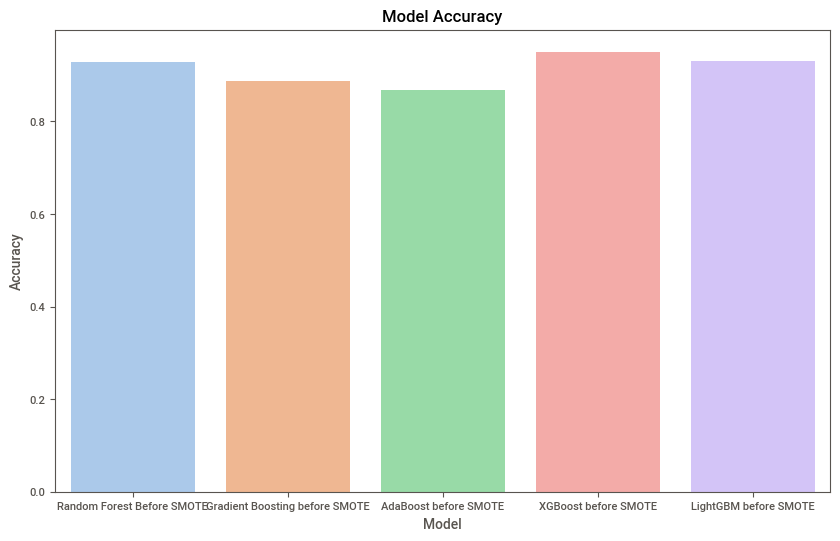

In [265]:
# plotting all the accuracies
palette = sns.color_palette("pastel")
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=initial_results, palette=palette)
plt.title('Model Accuracy')
plt.show()

### ROC Curve

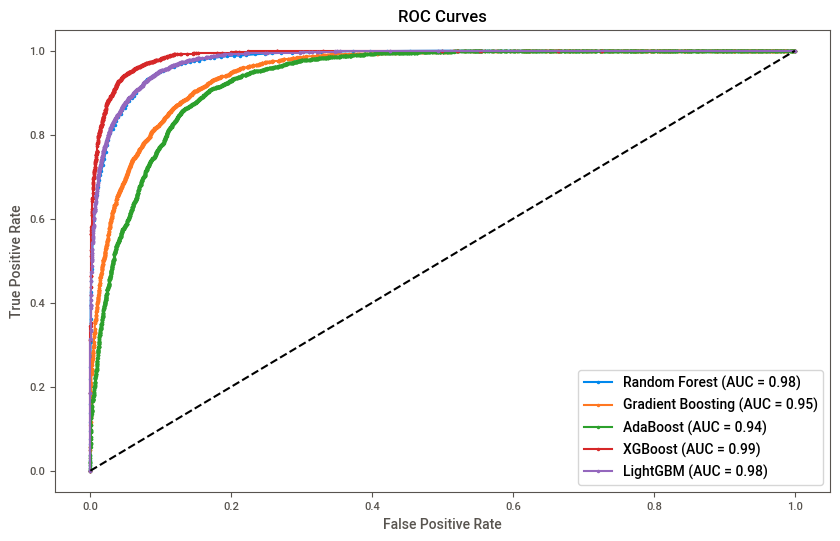

In [266]:
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay

# calculating the probabilities for the target variable
rf_probs = rf.predict_proba(x_test)[:,1]
gb_probs = gb.predict_proba(x_test)[:,1]
ab_probs = ab.predict_proba(x_test)[:,1]
xgb_probs = xgb.predict_proba(x_test)[:,1]
lgbm_probs = lgbm.predict_proba(x_test)[:,1]

# calculating the roc curve
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_probs)
ab_fpr, ab_tpr, _ = roc_curve(y_test, ab_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)
lgbm_fpr, lgbm_tpr, _ = roc_curve(y_test, lgbm_probs)

# calculating the auc score
rf_auc = roc_auc_score(y_test, rf_probs)
gb_auc = roc_auc_score(y_test, gb_probs)
ab_auc = roc_auc_score(y_test, ab_probs)
xgb_auc = roc_auc_score(y_test, xgb_probs)
lgbm_auc = roc_auc_score(y_test, lgbm_probs)

# plotting the roc curve
plt.figure(figsize=(10, 6))
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUC = %0.2f)' % rf_auc)
plt.plot(gb_fpr, gb_tpr, marker='.', label='Gradient Boosting (AUC = %0.2f)' % gb_auc)
plt.plot(ab_fpr, ab_tpr, marker='.', label='AdaBoost (AUC = %0.2f)' % ab_auc)
plt.plot(xgb_fpr, xgb_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % xgb_auc)
plt.plot(lgbm_fpr, lgbm_tpr, marker='.', label='LightGBM (AUC = %0.2f)' % lgbm_auc)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC Curves')
plt.show()

### Synthetic Minority Oversampling Technique (SMOTE)

SMOTE identifies similar samples of the minority class and generates new synthetic examples of the said samples. This would in turn increase the population of the minority class.

<Axes: xlabel='target'>

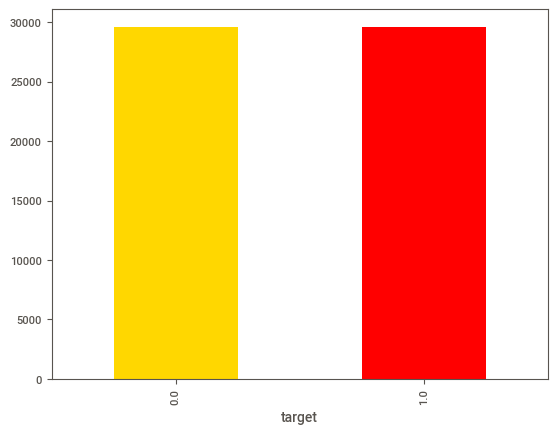

In [267]:
# performing SMOTE on the training data
from imblearn.over_sampling import SMOTE

# creating a SMOTE instance
smote = SMOTE(random_state=1)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

# checking the count of each class in the target variable after SMOTE
y_train_smote.value_counts().plot.bar(color=['gold','red'])

## Model Training after SMOTE

### Logistic Regression

In [268]:
lr = LogisticRegression()
lr.fit(x_train_smote, y_train_smote)

LogisticRegression()

In [269]:
train_accuracy = lr.score(x_train_smote, y_train_smote)
test_accuracy = lr.score(x_test, y_test)

print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Training Accuracy: 0.8753418644697302
Test Accuracy: 0.8612


In [270]:
pred_lr = lr.predict(x_test)

In [271]:
lr_accuracy = accuracy_score(y_test, pred_lr)
print(f'Accuracy of Logistic Regression Model: {lr_accuracy}')

Accuracy of Logistic Regression Model: 0.8612


In [272]:
lr_classification_report = classification_report(y_test, pred_lr)
print(lr_classification_report)

              precision    recall  f1-score   support

         0.0       0.95      0.86      0.90      7432
         1.0       0.68      0.88      0.76      2568

    accuracy                           0.86     10000
   macro avg       0.82      0.87      0.83     10000
weighted avg       0.88      0.86      0.87     10000



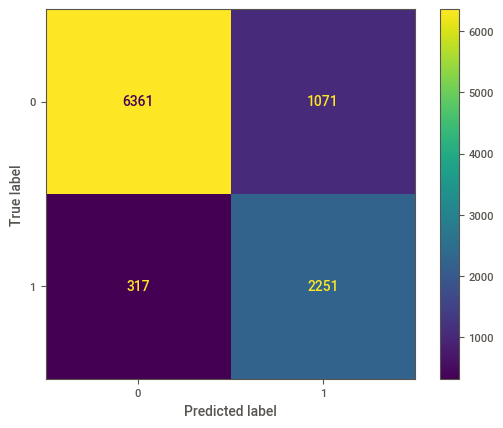

In [273]:
lr_confusion_matrix = confusion_matrix(y_test, pred_lr)
# displaying the confusion matrix
ConfusionMatrixDisplay(lr_confusion_matrix).plot()

### Decision Tree Classifier

In [274]:
dt = DecisionTreeClassifier() # creating an instance of the decision tree model
dt.fit(x_train_smote, y_train_smote)

DecisionTreeClassifier()

In [275]:
train_accuracy = dt.score(x_train_smote, y_train_smote)
test_accuracy = dt.score(x_test, y_test)

print('Train accuracy: ', train_accuracy)
print('Test accuracy: ', test_accuracy)

Train accuracy:  1.0
Test accuracy:  0.8805


In [276]:
pred_dt = dt.predict(x_test)

In [277]:
dt_accuracy = accuracy_score(y_test, pred_dt)
print('Accuracy of Decision Tree model: ', dt_accuracy)

Accuracy of Decision Tree model:  0.8805


In [278]:
dt_classification_report = classification_report(y_test, pred_dt)   
print(dt_classification_report)

              precision    recall  f1-score   support

         0.0       0.93      0.91      0.92      7432
         1.0       0.75      0.81      0.78      2568

    accuracy                           0.88     10000
   macro avg       0.84      0.86      0.85     10000
weighted avg       0.88      0.88      0.88     10000



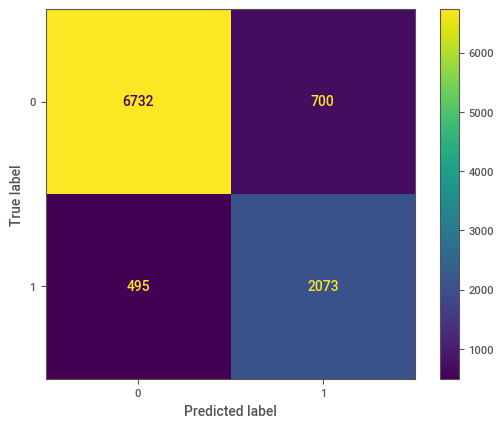

In [279]:
dt_confusion_matrix = confusion_matrix(y_test, pred_dt)
# displaying the confusion matrix
ConfusionMatrixDisplay(dt_confusion_matrix).plot()

### Random Forest Classifier

In [280]:
rf = RandomForestClassifier() # creating an instance of the random forest model
rf.fit(x_train_smote, y_train_smote)

RandomForestClassifier()

In [281]:
train_accuracy = rf.score(x_train_smote, y_train_smote)
test_accuracy = rf.score(x_test, y_test)

print('Train accuracy: ', train_accuracy)
print('Test accuracy: ', test_accuracy)

Train accuracy:  1.0
Test accuracy:  0.9224


In [282]:
pred_rf = rf.predict(x_test)

In [283]:
rf_accuracy = accuracy_score(y_test, pred_rf)
print('Accuracy of Random Forest model: ', rf_accuracy)

Accuracy of Random Forest model:  0.9224


In [284]:
rf_classification_report = classification_report(y_test, pred_rf)
print(rf_classification_report)

              precision    recall  f1-score   support

         0.0       0.97      0.92      0.95      7432
         1.0       0.81      0.92      0.86      2568

    accuracy                           0.92     10000
   macro avg       0.89      0.92      0.90     10000
weighted avg       0.93      0.92      0.92     10000



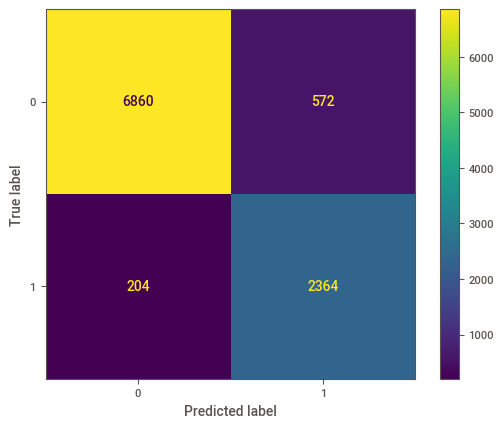

In [285]:
rf_confusion_matrix = confusion_matrix(y_test, pred_rf)
# displaying the confusion matrix
ConfusionMatrixDisplay(rf_confusion_matrix).plot()

### Support Vector Classifier

In [286]:
svc = SVC() # creating an instance of the support vector classifier model
svc.fit(x_train_smote, y_train_smote)

SVC()

In [287]:
train_accuracy = svc.score(x_train_smote, y_train_smote)
test_accuracy = svc.score(x_test, y_test)

print('Train accuracy: ', train_accuracy)
print('Test accuracy: ', test_accuracy)

Train accuracy:  0.9315426950737752
Test accuracy:  0.887


In [288]:
pred_svc = svc.predict(x_test)

In [289]:
svc_accuracy = accuracy_score(y_test, pred_svc)
print('Accuracy of Support Vector Classifier model: ', svc_accuracy)

Accuracy of Support Vector Classifier model:  0.887


In [290]:
svc_classification_report = classification_report(y_test, pred_svc)
print(svc_classification_report)

              precision    recall  f1-score   support

         0.0       0.95      0.89      0.92      7432
         1.0       0.74      0.88      0.80      2568

    accuracy                           0.89     10000
   macro avg       0.84      0.88      0.86     10000
weighted avg       0.90      0.89      0.89     10000



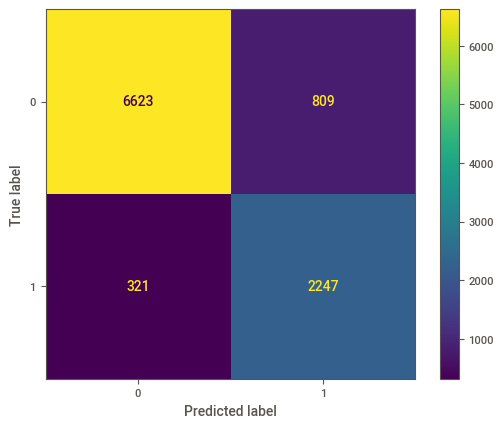

In [291]:
svc_confusion_matrix = confusion_matrix(y_test, pred_svc)
# displaying the confusion matrix
ConfusionMatrixDisplay(svc_confusion_matrix).plot()

### k-Neighbours Classifier

In [292]:
knn = KNeighborsClassifier() # creating an instance of the K Nearest Neighbors model
knn.fit(x_train_smote, y_train_smote)

KNeighborsClassifier()

In [293]:
train_accuracy = knn.score(x_train_smote, y_train_smote)
test_accuracy = knn.score(x_test, y_test)

print('Train accuracy: ', train_accuracy)
print('Test accuracy: ', test_accuracy)

Train accuracy:  0.9512442178478576
Test accuracy:  0.8915


In [294]:
pred_knn = knn.predict(x_test)

In [295]:
knn_accuracy = accuracy_score(y_test, pred_knn) 
print('Accuracy of K Nearest Neighbors model: ', knn_accuracy)

Accuracy of K Nearest Neighbors model:  0.8915


In [296]:
knn_classification_report = classification_report(y_test, pred_knn)
print(knn_classification_report)

              precision    recall  f1-score   support

         0.0       1.00      0.86      0.92      7432
         1.0       0.71      0.99      0.82      2568

    accuracy                           0.89     10000
   macro avg       0.85      0.92      0.87     10000
weighted avg       0.92      0.89      0.90     10000



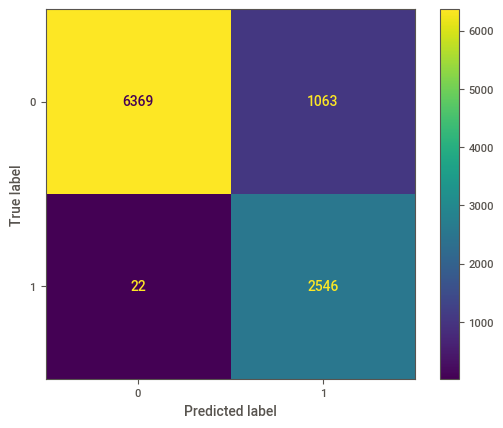

In [297]:
knn_confusion_matrix = confusion_matrix(y_test, pred_knn)
# displaying the confusion matrix
ConfusionMatrixDisplay(knn_confusion_matrix).plot()

### XGBoost Classifier

In [298]:
xgb = XGBClassifier() # creating an instance of the XGBoost model
xgb.fit(x_train_smote, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [299]:
train_accuracy = xgb.score(x_train_smote, y_train_smote)
test_accuracy = xgb.score(x_test, y_test)

print('Train accuracy: ', train_accuracy)
print('Test accuracy: ', test_accuracy)

Train accuracy:  0.9943444643279198
Test accuracy:  0.9382


In [300]:
pred_xgb = xgb.predict(x_test)

In [301]:
xgb_accuracy = accuracy_score(y_test, pred_xgb)
print('Accuracy of XGBoost model: ', xgb_accuracy)

Accuracy of XGBoost model:  0.9382


In [302]:
xgb_classification_report = classification_report(y_test, pred_xgb)
print(xgb_classification_report)

              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96      7432
         1.0       0.86      0.91      0.88      2568

    accuracy                           0.94     10000
   macro avg       0.91      0.93      0.92     10000
weighted avg       0.94      0.94      0.94     10000



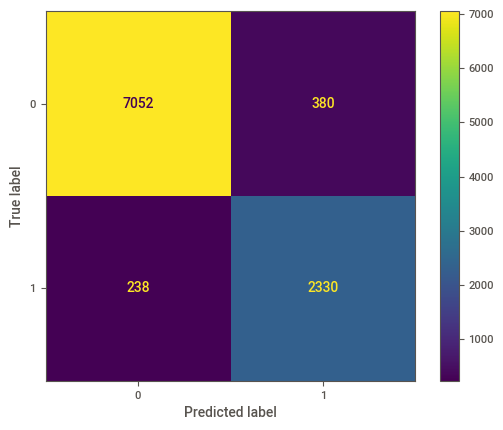

In [303]:
xgb_confusion_matrix = confusion_matrix(y_test, pred_xgb)
# displaying the confusion matrix
ConfusionMatrixDisplay(xgb_confusion_matrix).plot()

### Gradient Boosting Classifier

In [304]:
gb = GradientBoostingClassifier() # creating an instance of the Gradient Boosting model
gb.fit(x_train_smote, y_train_smote)

GradientBoostingClassifier()

In [305]:
train_accuracy = gb.score(x_train_smote, y_train_smote)
test_accuracy = gb.score(x_test, y_test)

print('Train accuracy: ', train_accuracy)
print('Test accuracy: ', test_accuracy)

Train accuracy:  0.9023533781274268
Test accuracy:  0.8704


In [306]:
pred_gb = gb.predict(x_test)

In [307]:
gb_accuracy = accuracy_score(y_test, pred_gb)
print('Accuracy of Gradient Boosting model: ', gb_accuracy)

Accuracy of Gradient Boosting model:  0.8704


In [308]:
gb_classification_report = classification_report(y_test, pred_gb)
print(gb_classification_report)

              precision    recall  f1-score   support

         0.0       0.95      0.87      0.91      7432
         1.0       0.70      0.88      0.78      2568

    accuracy                           0.87     10000
   macro avg       0.83      0.87      0.84     10000
weighted avg       0.89      0.87      0.87     10000



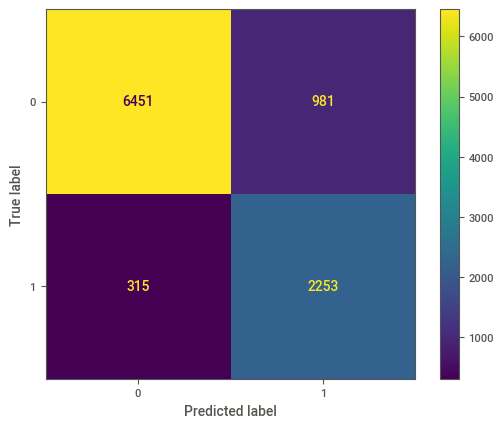

In [309]:
gb_confusion_matrix = confusion_matrix(y_test, pred_gb)
# displaying the confusion matrix
ConfusionMatrixDisplay(gb_confusion_matrix).plot()

### AdaBoost Classifier

In [310]:
ab = AdaBoostClassifier() # creating an instance of the AdaBoost model
ab.fit(x_train_smote, y_train_smote)

AdaBoostClassifier()

In [311]:
train_accuracy = ab.score(x_train_smote, y_train_smote)
test_accuracy = ab.score(x_test, y_test)

print('Train accuracy: ', train_accuracy)
print('Test accuracy: ', test_accuracy)

Train accuracy:  0.8787520680690144
Test accuracy:  0.8529


In [312]:
pred_ab = ab.predict(x_test)

In [313]:
ab_accuracy = accuracy_score(y_test, pred_ab)
print('Accuracy of AdaBoost model: ', ab_accuracy)

Accuracy of AdaBoost model:  0.8529


In [314]:
ab_classification_report = classification_report(y_test, pred_ab)
print(ab_classification_report)

              precision    recall  f1-score   support

         0.0       0.94      0.86      0.90      7432
         1.0       0.67      0.83      0.74      2568

    accuracy                           0.85     10000
   macro avg       0.80      0.85      0.82     10000
weighted avg       0.87      0.85      0.86     10000



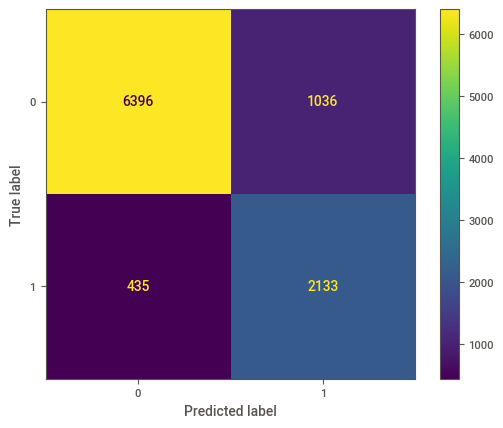

In [315]:
ab_confusion_matrix = confusion_matrix(y_test, pred_ab)
# displaying the confusion matrix
ConfusionMatrixDisplay(ab_confusion_matrix).plot()

### LightGBM Classifier

In [316]:
lgbm = LGBMClassifier() # creating an instance of the LightGBM model
lgbm.fit(x_train_smote, y_train_smote)

[LightGBM] [Info] Number of positive: 29617, number of negative: 29617
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.066788 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 55614
[LightGBM] [Info] Number of data points in the train set: 59234, number of used features: 569
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier()

In [317]:
train_accuracy = lgbm.score(x_train_smote, y_train_smote)
test_accuracy = lgbm.score(x_test, y_test)

print('Train accuracy: ', train_accuracy)
print('Test accuracy: ', test_accuracy)

Train accuracy:  0.9602761927271499
Test accuracy:  0.9169


In [318]:
pred_lgbm = lgbm.predict(x_test)

In [319]:
lgbm_accuracy = accuracy_score(y_test, pred_lgbm)
print('Accuracy of LightGBM model: ', lgbm_accuracy)

Accuracy of LightGBM model:  0.9169


In [320]:
lgbm_classification_report = classification_report(y_test, pred_lgbm)
print(lgbm_classification_report)

              precision    recall  f1-score   support

         0.0       0.96      0.92      0.94      7432
         1.0       0.80      0.89      0.85      2568

    accuracy                           0.92     10000
   macro avg       0.88      0.91      0.89     10000
weighted avg       0.92      0.92      0.92     10000



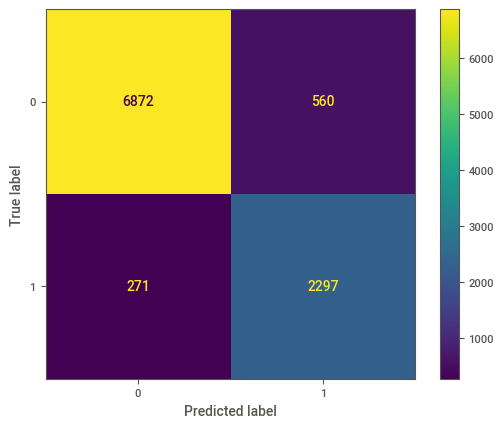

In [321]:
lgbm_confusion_matrix = confusion_matrix(y_test, pred_lgbm)
# displaying the confusion matrix
ConfusionMatrixDisplay(lgbm_confusion_matrix).plot()

## Model Evaluation

### General Model Evaluation

In [322]:
# saving all the accuracies and each component of the confusion matrix and classification report to a dataframe
accuracy = [lr_accuracy, dt_accuracy, rf_accuracy, svc_accuracy, knn_accuracy, xgb_accuracy, gb_accuracy, ab_accuracy, lgbm_accuracy] # list of accuracies
precision = [lr_classification_report.split()[5], dt_classification_report.split()[5], rf_classification_report.split()[5], svc_classification_report.split()[5], knn_classification_report.split()[5], xgb_classification_report.split()[5], gb_classification_report.split()[5], ab_classification_report.split()[5], lgbm_classification_report.split()[5]] # list of precisions
recall = [lr_classification_report.split()[6], dt_classification_report.split()[6], rf_classification_report.split()[6], svc_classification_report.split()[6], knn_classification_report.split()[6], xgb_classification_report.split()[6], gb_classification_report.split()[6], ab_classification_report.split()[6], lgbm_classification_report.split()[6]] # list of recalls
f1_score = [lr_classification_report.split()[7], dt_classification_report.split()[7], rf_classification_report.split()[7], svc_classification_report.split()[7], knn_classification_report.split()[7], xgb_classification_report.split()[7], gb_classification_report.split()[7], ab_classification_report.split()[7], lgbm_classification_report.split()[7]] # list of f1 scores
tn = [lr_confusion_matrix[0][0], dt_confusion_matrix[0][0], rf_confusion_matrix[0][0], svc_confusion_matrix[0][0], knn_confusion_matrix[0][0], xgb_confusion_matrix[0][0], gb_confusion_matrix[0][0], ab_confusion_matrix[0][0], lgbm_confusion_matrix[0][0]] # list of true negatives
fp = [lr_confusion_matrix[0][1], dt_confusion_matrix[0][1], rf_confusion_matrix[0][1], svc_confusion_matrix[0][1], knn_confusion_matrix[0][1], xgb_confusion_matrix[0][1], gb_confusion_matrix[0][1], ab_confusion_matrix[0][1], lgbm_confusion_matrix[0][1]] # list of false positives
fn = [lr_confusion_matrix[1][0], dt_confusion_matrix[1][0], rf_confusion_matrix[1][0], svc_confusion_matrix[1][0], knn_confusion_matrix[1][0], xgb_confusion_matrix[1][0], gb_confusion_matrix[1][0], ab_confusion_matrix[1][0], lgbm_confusion_matrix[1][0]] # list of false negatives
tp = [lr_confusion_matrix[1][1], dt_confusion_matrix[1][1], rf_confusion_matrix[1][1], svc_confusion_matrix[1][1], knn_confusion_matrix[1][1], xgb_confusion_matrix[1][1], gb_confusion_matrix[1][1], ab_confusion_matrix[1][1], lgbm_confusion_matrix[1][1]] # list of true positives

models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Support Vector Classifier', 'K Nearest Neighbors', 'XGBoost', 'Gradient Boosting', 'AdaBoost', 'LightGBM Classifier'] # list of models

results = pd.DataFrame({'Model': models, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1_score, 'True Negative': tn, 'False Positive': fp, 'False Negative': fn, 'True Positive': tp}) # defining the structure of the dataframe
results

,Model,Accuracy,Precision,Recall,F1 Score,True Negative,False Positive,False Negative,True Positive
0,Logistic Regression,0.8612,0.95,0.86,0.90,6361,1071,317,2251
1,Decision Tree,0.8805,0.93,0.91,0.92,6732,700,495,2073
2,Random Forest,0.9224,0.97,0.92,0.95,6860,572,204,2364
3,Support Vector Classifier,0.8870,0.95,0.89,0.92,6623,809,321,2247
4,K Nearest Neighbors,0.8915,1.00,0.86,0.92,6369,1063,22,2546
5,XGBoost,0.9382,0.97,0.95,0.96,7052,380,238,2330
6,Gradient Boosting,0.8704,0.95,0.87,0.91,6451,981,315,2253
7,AdaBoost,0.8529,0.94,0.86,0.90,6396,1036,435,2133
8,LightGBM Classifier,0.9169,0.96,0.92,0.94,6872,560,271,2297


### roc_auc score

In [323]:
# calculating the roc auc curve for all the models
from sklearn.metrics import roc_auc_score

# calculating the roc auc score for all the models
roc_auc_lr = roc_auc_score(y_test, pred_lr)
roc_auc_dt = roc_auc_score(y_test, pred_dt)
roc_auc_rf = roc_auc_score(y_test, pred_rf)
roc_auc_svc = roc_auc_score(y_test, pred_svc)
roc_auc_knn = roc_auc_score(y_test, pred_knn)
roc_auc_xgb = roc_auc_score(y_test, pred_xgb)
roc_auc_gb = roc_auc_score(y_test, pred_gb)
roc_auc_ab = roc_auc_score(y_test, pred_ab)

# displaying the roc auc score for all the models
print('ROC AUC score for Logistic Regression: ', roc_auc_lr)
print('ROC AUC score for Decision Tree: ', roc_auc_dt)
print('ROC AUC score for Random Forest: ', roc_auc_rf)
print('ROC AUC score for Support Vector Classifier: ', roc_auc_svc)
print('ROC AUC score for K Nearest Neighbors: ', roc_auc_knn)
print('ROC AUC score for XGBoost: ', roc_auc_xgb)
print('ROC AUC score for Gradient Boosting: ', roc_auc_gb)
print('ROC AUC score for AdaBoost: ', roc_auc_ab)

ROC AUC score for Logistic Regression:  0.8662255330992693
ROC AUC score for Decision Tree:  0.8565278462420651
ROC AUC score for Random Forest:  0.9217981348651451
ROC AUC score for Support Vector Classifier:  0.8830731969860064
ROC AUC score for K Nearest Neighbors:  0.9242014409357195
ROC AUC score for XGBoost:  0.9280953123480512
ROC AUC score for Gradient Boosting:  0.8726698389384626
ROC AUC score for AdaBoost:  0.8456051376719013


### ROC Curve

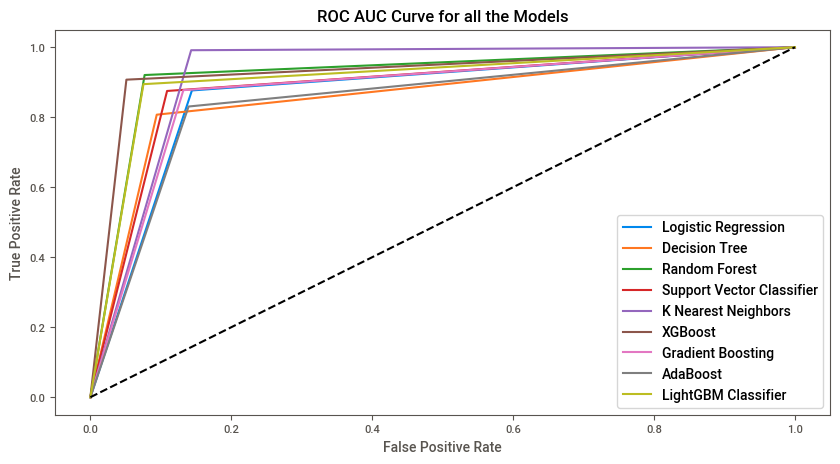

In [324]:
# drawing the roc auc curve for all the models
from sklearn.metrics import roc_curve

fpr_lr, tpr_lr, _ = roc_curve(y_test, pred_lr)
fpr_dt, tpr_dt, _ = roc_curve(y_test, pred_dt)
fpr_rf, tpr_rf, _ = roc_curve(y_test, pred_rf)
fpr_svc, tpr_svc, _ = roc_curve(y_test, pred_svc)
fpr_knn, tpr_knn, _ = roc_curve(y_test, pred_knn)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, pred_xgb)
fpr_gb, tpr_gb, _ = roc_curve(y_test, pred_gb)
fpr_ab, tpr_ab, _ = roc_curve(y_test, pred_ab)
fpr_lgbm, tpr_lgbm, _ = roc_curve(y_test, pred_lgbm)

plt.figure(figsize=(10, 5))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.plot(fpr_dt, tpr_dt, label='Decision Tree')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot(fpr_svc, tpr_svc, label='Support Vector Classifier')
plt.plot(fpr_knn, tpr_knn, label='K Nearest Neighbors')
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost')
plt.plot(fpr_gb, tpr_gb, label='Gradient Boosting')
plt.plot(fpr_ab, tpr_ab, label='AdaBoost')
plt.plot(fpr_lgbm, tpr_lgbm, label='LightGBM Classifier')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve for all the Models')
plt.legend()
plt.show()

### Feature Importances

In [325]:
feature_names = x.columns

# handling the feature importance of each model 
lr_importance = np.abs(lr.coef_[0])
dt_importance = dt.feature_importances_
rf_importance = rf.feature_importances_
xgb_importance = xgb.feature_importances_
gb_importance = gb.feature_importances_
ab_importance = ab.feature_importances_
lgbm_importance = lgbm.feature_importances_

In [326]:
# defining a function to normalize the feature importance
def normalize_importances(importances):
    min_val = importances.min()
    max_val = importances.max()
    return (importances - min_val) / (max_val - min_val)

In [327]:
# creating a function to plot the top 10 features of each model
def plot_feature_importance(importances, model_name, top_n=10):
    indices = np.argsort(importances)[-top_n:] # getting the indices of the top 10 features
    top_features = np.array(feature_names)[indices] # selecting the top 10 features
    top_importances = importances[indices] # extracting the corresponding importance of the top 10 features

    normalized_importances = normalize_importances(top_importances) # the importances are normalized
    
    cmap = plt.get_cmap('viridis') 
    colors = cmap(normalized_importances) # the colors for the bars are defined

    plt.figure(figsize=(10, 8))
    plt.bar(top_features, top_importances, color=colors)
    plt.xlabel('Features')
    plt.ylabel('Nomalized Importance')
    plt.title(f'Top {top_n} features of the {model_name} Model')
    plt.xticks(rotation=90)
    plt.show()

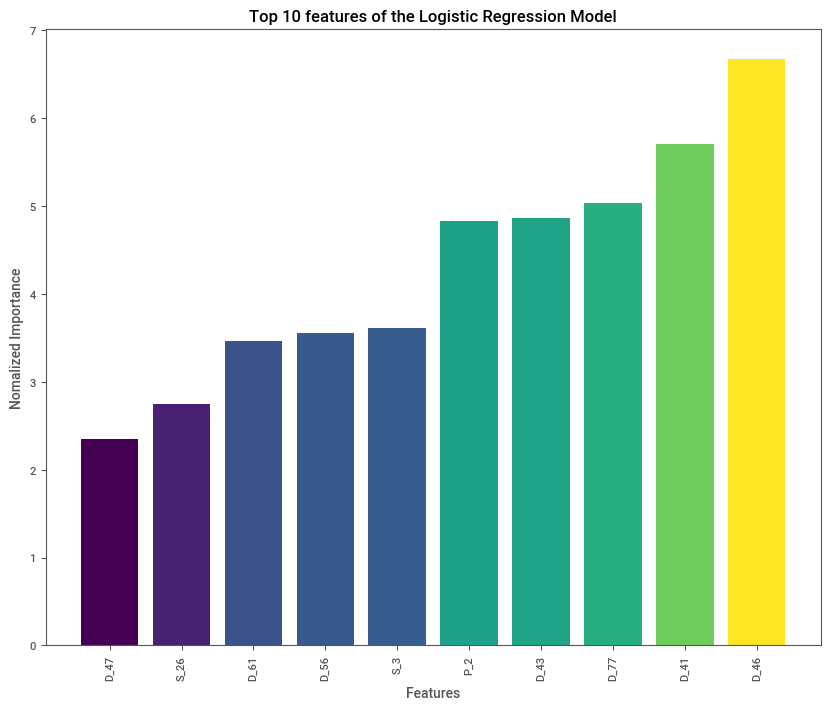

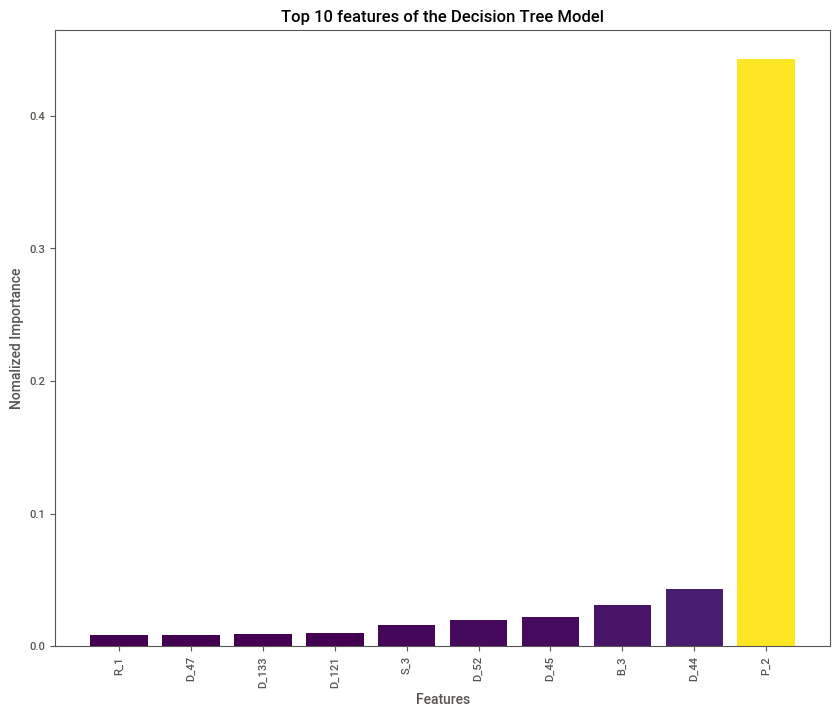

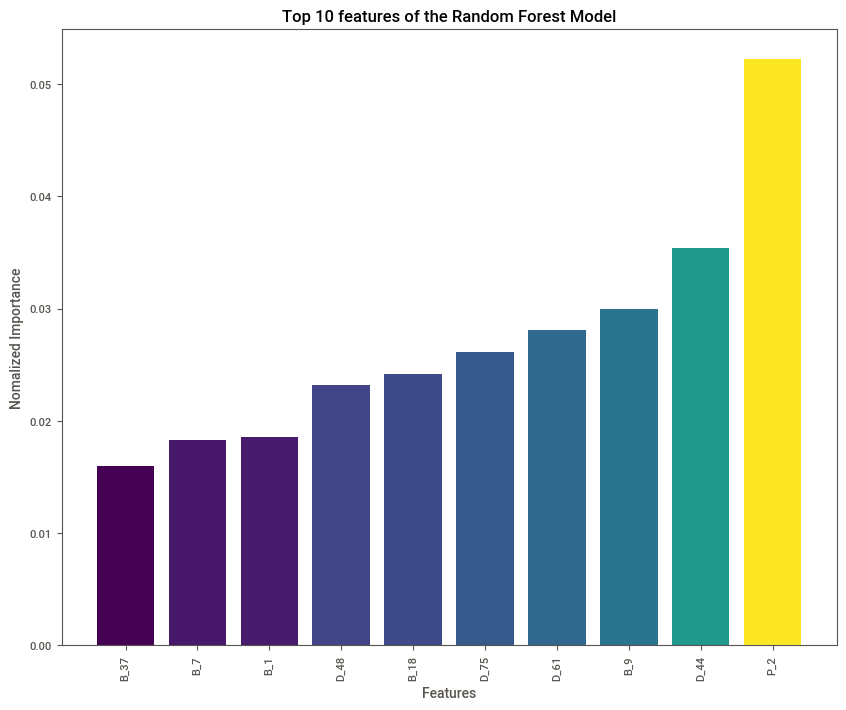

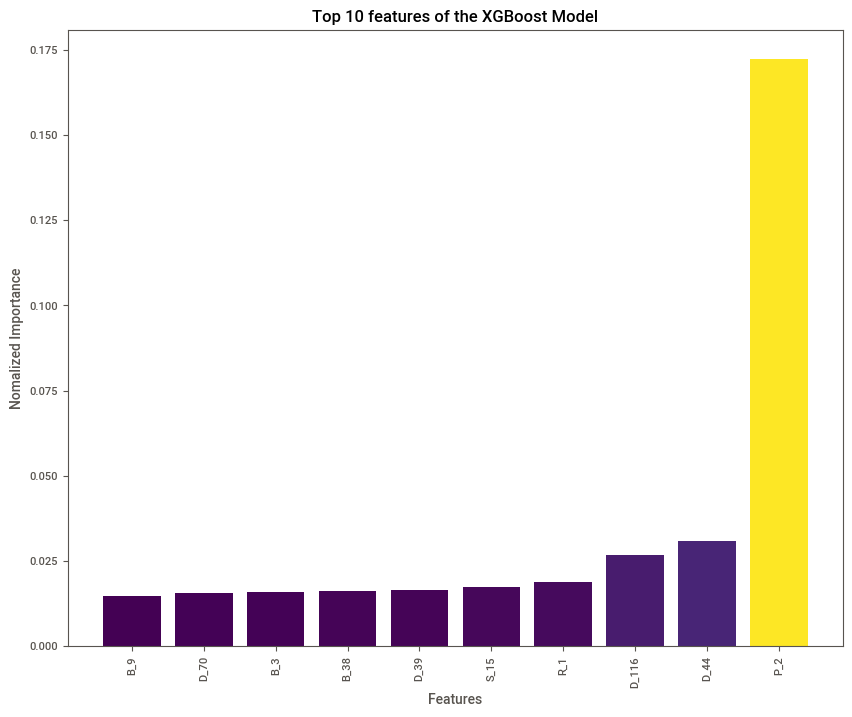

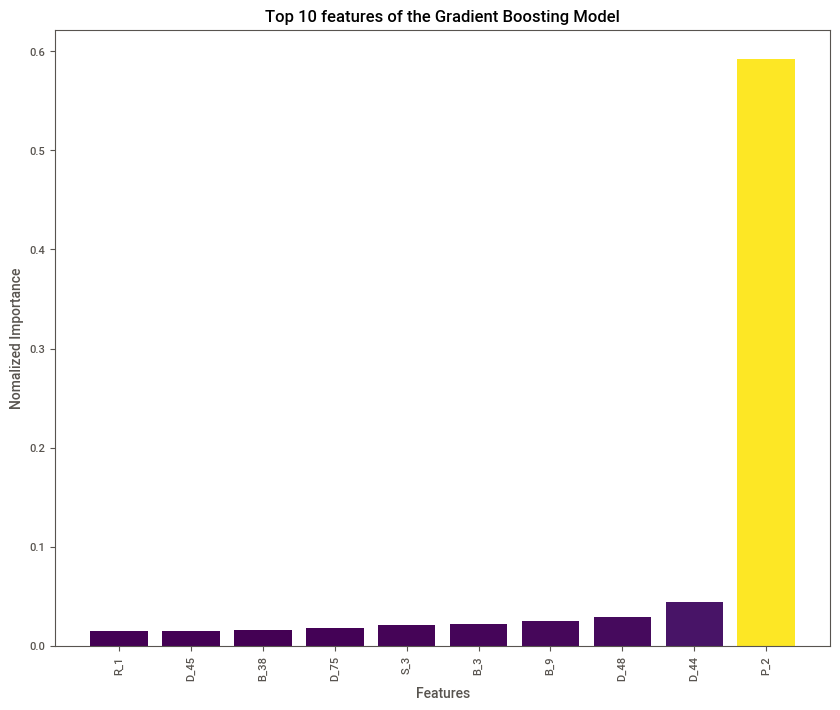

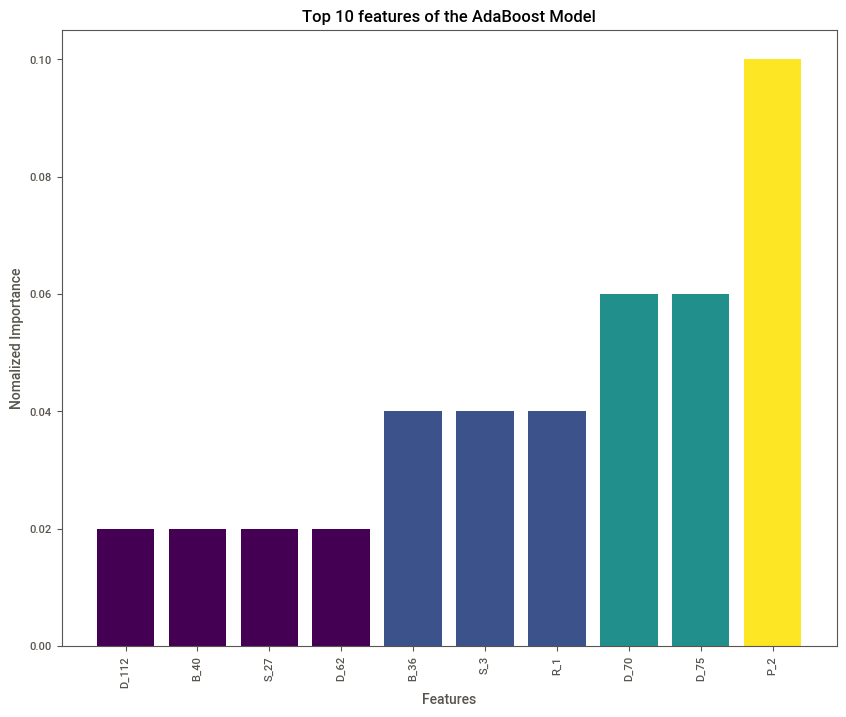

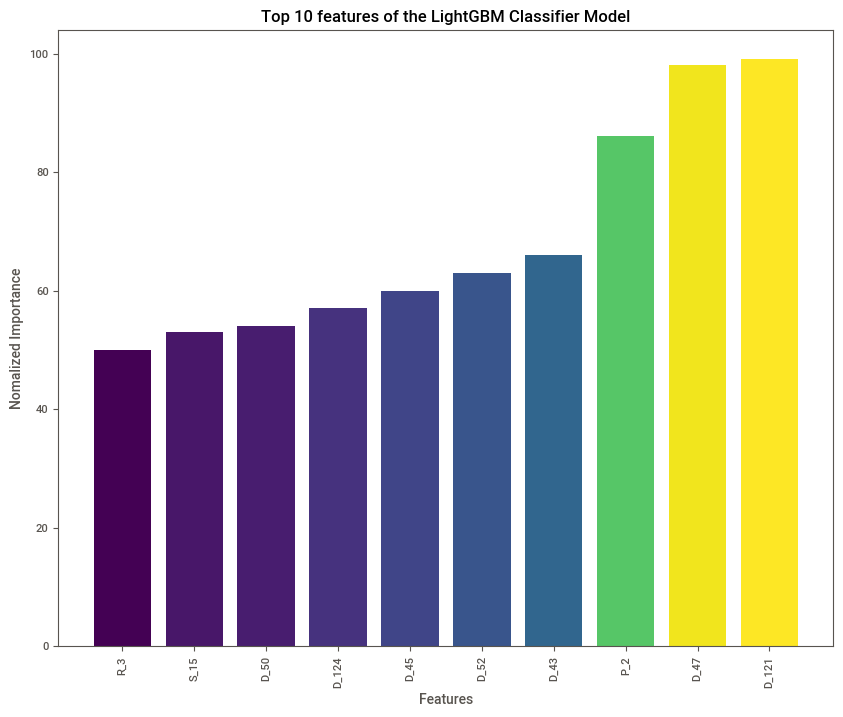

In [328]:
# calling the function for each model
plot_feature_importance(lr_importance, 'Logistic Regression')
plot_feature_importance(dt_importance, 'Decision Tree')
plot_feature_importance(rf_importance, 'Random Forest')
plot_feature_importance(xgb_importance, 'XGBoost')
plot_feature_importance(gb_importance, 'Gradient Boosting')
plot_feature_importance(ab_importance, 'AdaBoost')
plot_feature_importance(lgbm_importance, 'LightGBM Classifier')

## Model Re-training

We can drop the features which are not of major importance and retrain the top models.

### Random Forest Classifier

<Axes: xlabel='target'>

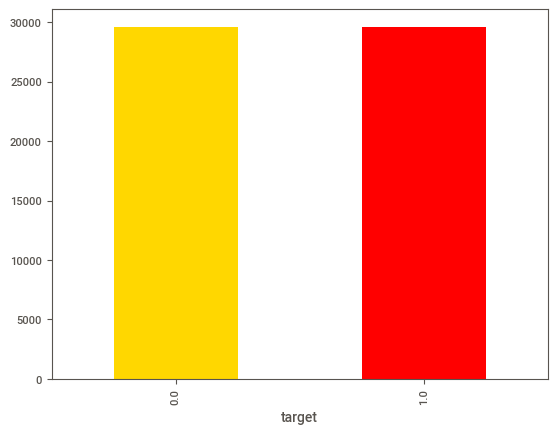

In [329]:
# dropping the features which have less than 0.01 importance in the random forest model
rf_importance = rf.feature_importances_
indices = np.where(rf_importance < 0.01)
x_rf = x.drop(x.columns[indices], axis=1)

# splitting the data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x_rf, y, test_size=0.2, random_state=1)

# performing SMOTE on the training data
smote = SMOTE(random_state=1)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

# plotting distribution of target variable after SMOTE
y_train_smote.value_counts().plot.bar(color=['gold','red'])

In [330]:
rf = RandomForestClassifier()
rf.fit(x_train_smote, y_train_smote)

RandomForestClassifier()

In [331]:
retrain_accuracy = rf.score(x_train_smote, y_train_smote)
retest_accuracy = rf.score(x_test, y_test)

print('Retrain accuracy: ', retrain_accuracy)
print('Retest accuracy: ', retest_accuracy)

Retrain accuracy:  1.0
Retest accuracy:  0.9338


In [332]:
pred_rf_retrain = rf.predict(x_test)

In [333]:
rf_retrain_accuracy = accuracy_score(y_test, pred_rf_retrain)
print('Accuracy of Random Forest model after retraining: ', rf_retrain_accuracy)

Accuracy of Random Forest model after retraining:  0.9338


In [334]:
rf_retrain_classification_report = classification_report(y_test, pred_rf_retrain)
print(rf_retrain_classification_report)

              precision    recall  f1-score   support

         0.0       0.97      0.94      0.95      7432
         1.0       0.83      0.93      0.88      2568

    accuracy                           0.93     10000
   macro avg       0.90      0.93      0.92     10000
weighted avg       0.94      0.93      0.93     10000



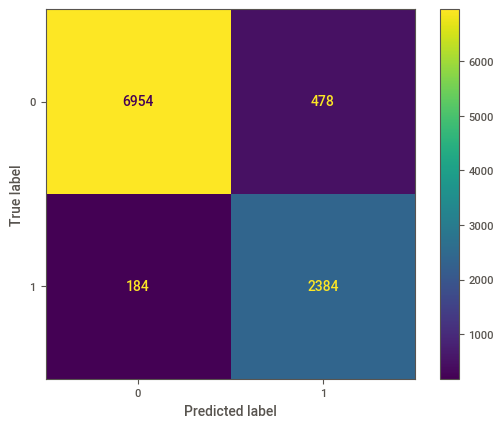

In [335]:
rf_retrain_confusion_matrix = confusion_matrix(y_test, pred_rf_retrain)
ConfusionMatrixDisplay(rf_retrain_confusion_matrix).plot()

#### XGBoost Classifier

<Axes: xlabel='target'>

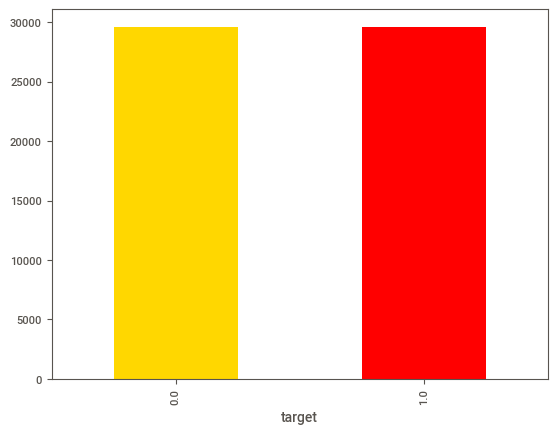

In [336]:
# dropping the features which have less than 0.01 importance in the xgboost model
xgb_importance = xgb.feature_importances_
indices = np.where(xgb_importance < 0.01)
x_xgb = x.drop(x.columns[indices], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x_xgb, y, test_size=0.2, random_state=1)

smote = SMOTE(random_state=1)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

y_train_smote.value_counts().plot.bar(color=['gold','red'])

In [337]:
xgb = XGBClassifier()
xgb.fit(x_train_smote, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [338]:
retrain_accuracy = xgb.score(x_train_smote, y_train_smote)
retest_accuracy = xgb.score(x_test, y_test)

print('Retrain accuracy: ', retrain_accuracy)
print('Retest accuracy: ', retest_accuracy)

Retrain accuracy:  0.9456055643718135
Retest accuracy:  0.8776


In [339]:
pred_xgb_retrain = xgb.predict(x_test)

In [340]:
xgb_retrain_accuracy = accuracy_score(y_test, pred_xgb_retrain)
print('Accuracy of XGBoost model after retraining: ', xgb_retrain_accuracy)

Accuracy of XGBoost model after retraining:  0.8776


In [341]:
xgb_retrain_classification_report = classification_report(y_test, pred_xgb_retrain)
print(xgb_retrain_classification_report)

              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92      7432
         1.0       0.73      0.83      0.78      2568

    accuracy                           0.88     10000
   macro avg       0.83      0.86      0.85     10000
weighted avg       0.88      0.88      0.88     10000



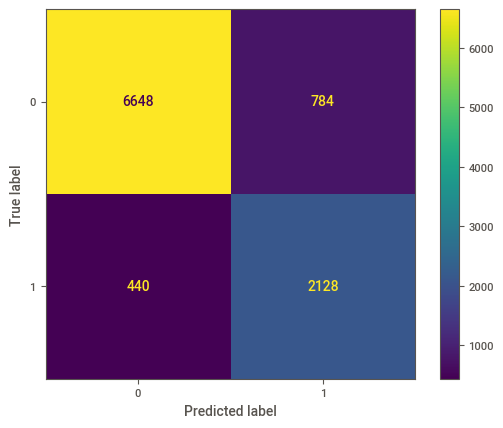

In [342]:
xgb_retrain_confusion_matrix = confusion_matrix(y_test, pred_xgb_retrain)
ConfusionMatrixDisplay(xgb_retrain_confusion_matrix).plot()

### Gradient Boosting Classifer

<Axes: xlabel='target'>

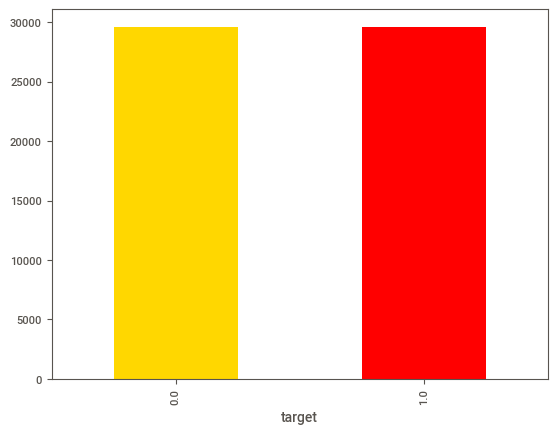

In [343]:
# dropping the features which have less than 0.01 importance in the gradient boosting model
gb_importance = gb.feature_importances_
indices = np.where(gb_importance < 0.01)
x_gb = x.drop(x.columns[indices], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x_gb, y, test_size=0.2, random_state=1)

smote = SMOTE(random_state=1)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

y_train_smote.value_counts().plot.bar(color=['gold','red'])

In [344]:
gb = GradientBoostingClassifier()
gb.fit(x_train_smote, y_train_smote)

GradientBoostingClassifier()

In [345]:
retrain_accuracy = gb.score(x_train_smote, y_train_smote)
retest_accuracy = gb.score(x_test, y_test)

print('Retrain accuracy: ', retrain_accuracy)
print('Retest accuracy: ', retest_accuracy)

Retrain accuracy:  0.8825336799810919
Retest accuracy:  0.8551


In [346]:
pred_gb_retrain = gb.predict(x_test)

In [347]:
gb_retrain_accuracy = accuracy_score(y_test, pred_gb_retrain)
print('Accuracy of Gradient Boosting model after retraining: ', gb_retrain_accuracy)

Accuracy of Gradient Boosting model after retraining:  0.8551


In [348]:
gb_retrain_classification_report = classification_report(y_test, pred_gb_retrain)
print(gb_retrain_classification_report)

              precision    recall  f1-score   support

         0.0       0.95      0.85      0.90      7432
         1.0       0.67      0.87      0.75      2568

    accuracy                           0.86     10000
   macro avg       0.81      0.86      0.83     10000
weighted avg       0.88      0.86      0.86     10000



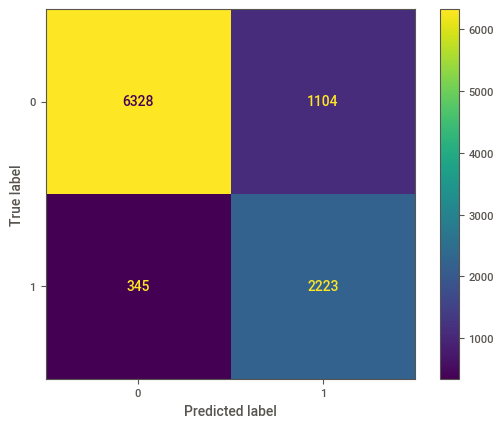

In [349]:
gb_retrain_confusion_matrix = confusion_matrix(y_test, pred_gb_retrain)
ConfusionMatrixDisplay(gb_retrain_confusion_matrix).plot()

### AdaBoost Classifier

<Axes: xlabel='target'>

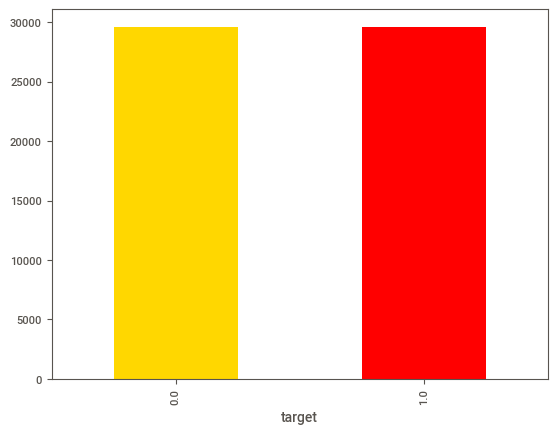

In [350]:
# dropping the features which have less than 0.01 importance in the adaboost model
ab_importance = ab.feature_importances_
indices = np.where(ab_importance < 0.01)
x_ab = x.drop(x.columns[indices], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x_ab, y, test_size=0.2, random_state=1)

smote = SMOTE(random_state=1)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

y_train_smote.value_counts().plot.bar(color=['gold','red'])

In [351]:
ab = AdaBoostClassifier()
ab.fit(x_train_smote, y_train_smote)

AdaBoostClassifier()

In [352]:
retrain_accuracy = ab.score(x_train_smote, y_train_smote)
retest_accuracy = ab.score(x_test, y_test)

print('Retrain accuracy: ', retrain_accuracy)
print('Retest accuracy: ', retest_accuracy)

Retrain accuracy:  0.8787858324610865
Retest accuracy:  0.8539


In [353]:
ab_retrain_accuracy = accuracy_score(y_test, pred_ab)
print('Accuracy of AdaBoost model after retraining: ', ab_retrain_accuracy)

Accuracy of AdaBoost model after retraining:  0.8529


In [354]:
ab_retrain_classification_report = classification_report(y_test, pred_ab)
print(ab_retrain_classification_report)

              precision    recall  f1-score   support

         0.0       0.94      0.86      0.90      7432
         1.0       0.67      0.83      0.74      2568

    accuracy                           0.85     10000
   macro avg       0.80      0.85      0.82     10000
weighted avg       0.87      0.85      0.86     10000



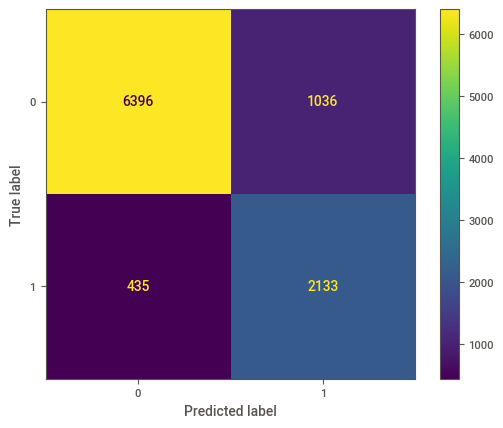

In [355]:
ab_retrain_confusion_matrix = confusion_matrix(y_test, pred_ab)
ConfusionMatrixDisplay(ab_retrain_confusion_matrix).plot()

### LightGBM Classifier

<Axes: xlabel='target'>

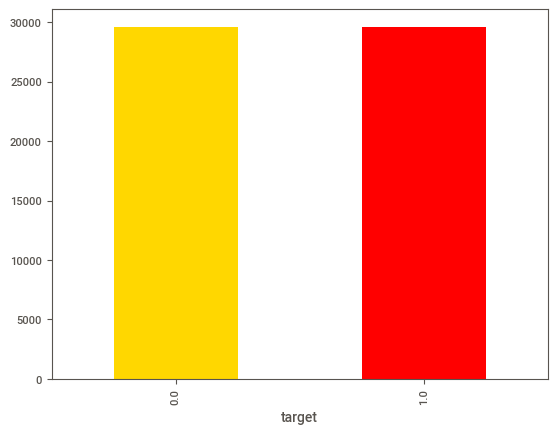

In [356]:
# dropping the features which have less than 0.01 importance in the lightgbm model
lgbm_importance = lgbm.feature_importances_
indices = np.where(lgbm_importance < 0.01)
x_lgbm = x.drop(x.columns[indices], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x_lgbm, y, test_size=0.2, random_state=1)

smote = SMOTE(random_state=1)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

y_train_smote.value_counts().plot.bar(color=['gold','red'])

In [357]:
lgbm = LGBMClassifier()
lgbm.fit(x_train_smote, y_train_smote)

[LightGBM] [Info] Number of positive: 29617, number of negative: 29617
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.021863 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 41996
[LightGBM] [Info] Number of data points in the train set: 59234, number of used features: 176
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier()

In [358]:
retrain_accuracy = lgbm.score(x_train_smote, y_train_smote)
retest_accuracy = lgbm.score(x_test, y_test)

print('Retrain accuracy: ', retrain_accuracy)
print('Retest accuracy: ', retest_accuracy)

Retrain accuracy:  0.960006077590573
Retest accuracy:  0.9147


In [359]:
lgbm_retrain_accuracy = accuracy_score(y_test, pred_lgbm)
print('Accuracy of LightGBM model after retraining: ', lgbm_retrain_accuracy)

Accuracy of LightGBM model after retraining:  0.9169


In [360]:
lgbm_retrain_classification_report = classification_report(y_test, pred_lgbm)
print(lgbm_retrain_classification_report)

              precision    recall  f1-score   support

         0.0       0.96      0.92      0.94      7432
         1.0       0.80      0.89      0.85      2568

    accuracy                           0.92     10000
   macro avg       0.88      0.91      0.89     10000
weighted avg       0.92      0.92      0.92     10000



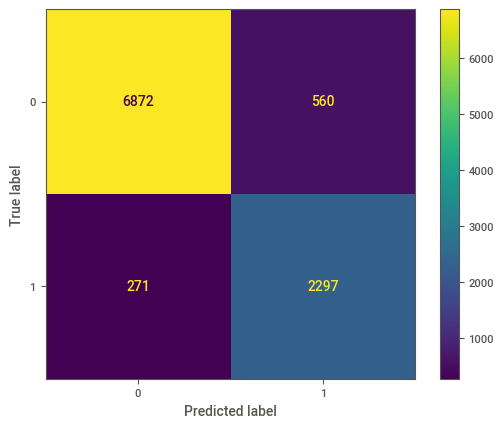

In [361]:
lgbm_retrain_confusion_matrix = confusion_matrix(y_test, pred_lgbm)
ConfusionMatrixDisplay(lgbm_retrain_confusion_matrix).plot()

## Model Evaluation After Retraining

### General Evaluation

In [362]:
# adding the new results to the dataframe
accuracy = [lr_accuracy, dt_accuracy, rf_accuracy, svc_accuracy, knn_accuracy, xgb_accuracy, gb_accuracy, ab_accuracy, lgbm_accuracy, rf_retrain_accuracy, xgb_retrain_accuracy, gb_retrain_accuracy, ab_retrain_accuracy, lgbm_retrain_accuracy] 
precision = [lr_classification_report.split()[5], dt_classification_report.split()[5], rf_classification_report.split()[5], svc_classification_report.split()[5], knn_classification_report.split()[5], xgb_classification_report.split()[5], gb_classification_report.split()[5], ab_classification_report.split()[5], lgbm_classification_report.split()[5], rf_retrain_classification_report.split()[5], xgb_retrain_classification_report.split()[5], gb_retrain_classification_report.split()[5], ab_retrain_classification_report.split()[5], lgbm_retrain_classification_report.split()[5]]
recall = [lr_classification_report.split()[6], dt_classification_report.split()[6], rf_classification_report.split()[6], svc_classification_report.split()[6], knn_classification_report.split()[6], xgb_classification_report.split()[6], gb_classification_report.split()[6], ab_classification_report.split()[6], lgbm_classification_report.split()[6], rf_retrain_classification_report.split()[6], xgb_retrain_classification_report.split()[6], gb_retrain_classification_report.split()[6], ab_retrain_classification_report.split()[6], lgbm_retrain_classification_report.split()[6]] 
f1_score = [lr_classification_report.split()[7], dt_classification_report.split()[7], rf_classification_report.split()[7], svc_classification_report.split()[7], knn_classification_report.split()[7], xgb_classification_report.split()[7], gb_classification_report.split()[7], ab_classification_report.split()[7], lgbm_classification_report.split()[7], rf_retrain_classification_report.split()[7], xgb_retrain_classification_report.split()[7], gb_retrain_classification_report.split()[7], ab_retrain_classification_report.split()[7], lgbm_retrain_classification_report.split()[7]] 
tn = [lr_confusion_matrix[0][0], dt_confusion_matrix[0][0], rf_confusion_matrix[0][0], svc_confusion_matrix[0][0], knn_confusion_matrix[0][0], xgb_confusion_matrix[0][0], gb_confusion_matrix[0][0], ab_confusion_matrix[0][0], lgbm_confusion_matrix[0][0], rf_retrain_confusion_matrix[0][0], xgb_retrain_confusion_matrix[0][0], gb_retrain_confusion_matrix[0][0], ab_retrain_confusion_matrix[0][0], lgbm_retrain_confusion_matrix[0][0]] 
fp = [lr_confusion_matrix[0][1], dt_confusion_matrix[0][1], rf_confusion_matrix[0][1], svc_confusion_matrix[0][1], knn_confusion_matrix[0][1], xgb_confusion_matrix[0][1], gb_confusion_matrix[0][1], ab_confusion_matrix[0][1], lgbm_confusion_matrix[0][1], rf_retrain_confusion_matrix[0][1], xgb_retrain_confusion_matrix[0][1], gb_retrain_confusion_matrix[0][1], ab_retrain_confusion_matrix[0][1], lgbm_retrain_confusion_matrix[0][1]] 
fn = [lr_confusion_matrix[1][0], dt_confusion_matrix[1][0], rf_confusion_matrix[1][0], svc_confusion_matrix[1][0], knn_confusion_matrix[1][0], xgb_confusion_matrix[1][0], gb_confusion_matrix[1][0], ab_confusion_matrix[1][0], lgbm_confusion_matrix[1][0], rf_retrain_confusion_matrix[1][0], xgb_retrain_confusion_matrix[1][0], gb_retrain_confusion_matrix[1][0], ab_retrain_confusion_matrix[1][0], lgbm_retrain_confusion_matrix[1][0]] 
tp = [lr_confusion_matrix[1][1], dt_confusion_matrix[1][1], rf_confusion_matrix[1][1], svc_confusion_matrix[1][1], knn_confusion_matrix[1][1], xgb_confusion_matrix[1][1], gb_confusion_matrix[1][1], ab_confusion_matrix[1][1], lgbm_confusion_matrix[1][1], rf_retrain_confusion_matrix[1][1], xgb_retrain_confusion_matrix[1][1], gb_retrain_confusion_matrix[1][1], ab_retrain_confusion_matrix[1][1], lgbm_retrain_confusion_matrix[1][1]] 

models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Support Vector Classifier', 'K Nearest Neighbors', 'XGBoost', 'Gradient Boosting', 'AdaBoost', 'LightGBM Classifier', 'Random Forest Retraining', 'XGBoost Retraining', 'Gradient Boosting Retraining', 'AdaBoost Retraining', 'LightGBM Classifier Retraining'] 

results = pd.DataFrame({'Model': models, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1_score, 'True Negatives': tn, 'False Positives': fp, 'False Negatives': fn, 'True Positives': tp}) 
results

,Model,Accuracy,Precision,Recall,F1 Score,True Negatives,False Positives,False Negatives,True Positives
0,Logistic Regression,0.8612,0.95,0.86,0.90,6361,1071,317,2251
1,Decision Tree,0.8805,0.93,0.91,0.92,6732,700,495,2073
2,Random Forest,0.9224,0.97,0.92,0.95,6860,572,204,2364
3,Support Vector Classifier,0.8870,0.95,0.89,0.92,6623,809,321,2247
4,K Nearest Neighbors,0.8915,1.00,0.86,0.92,6369,1063,22,2546
5,XGBoost,0.9382,0.97,0.95,0.96,7052,380,238,2330
6,Gradient Boosting,0.8704,0.95,0.87,0.91,6451,981,315,2253
7,AdaBoost,0.8529,0.94,0.86,0.90,6396,1036,435,2133
8,LightGBM Classifier,0.9169,0.96,0.92,0.94,6872,560,271,2297
9,Random Forest Retraining,0.9338,0.97,0.94,0.95,6954,478,184,2384


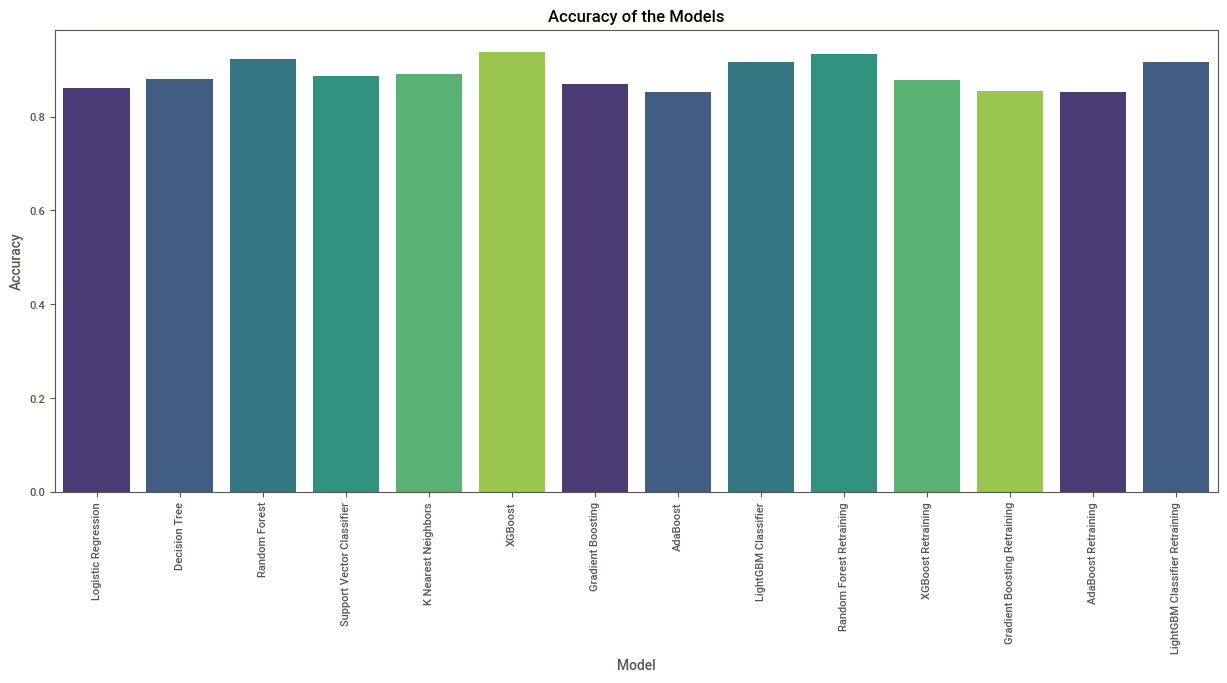

In [363]:
# plotting the accuracies using bar plot 
palette = sns.color_palette("viridis")
plt.figure(figsize=(15, 6))
sns.barplot(x='Model', y='Accuracy', data=results, palette=palette)
plt.xticks(rotation=90)
plt.title('Accuracy of the Models')
plt.show()

## Final Result Analysis

In [364]:
# merging the initial results dataframe with the retrained results dataframe
final_results = pd.concat([initial_results, results], axis=0)
final_results

,Model,Accuracy,Precision,Recall,F1 Score,True Negatives,False Positives,False Negatives,True Positives
0,Random Forest Before SMOTE,0.9291,0.95,0.96,0.95,7109,323,386,2182
1,Gradient Boosting before SMOTE,0.8873,0.92,0.93,0.92,6881,551,576,1992
2,AdaBoost before SMOTE,0.8684,0.91,0.92,0.91,6818,614,702,1866
3,XGBoost before SMOTE,0.9506,0.97,0.97,0.97,7196,236,258,2310
4,LightGBM before SMOTE,0.9316,0.95,0.95,0.95,7088,344,340,2228
0,Logistic Regression,0.8612,0.95,0.86,0.90,6361,1071,317,2251
1,Decision Tree,0.8805,0.93,0.91,0.92,6732,700,495,2073
2,Random Forest,0.9224,0.97,0.92,0.95,6860,572,204,2364
3,Support Vector Classifier,0.8870,0.95,0.89,0.92,6623,809,321,2247
4,K Nearest Neighbors,0.8915,1.00,0.86,0.92,6369,1063,22,2546


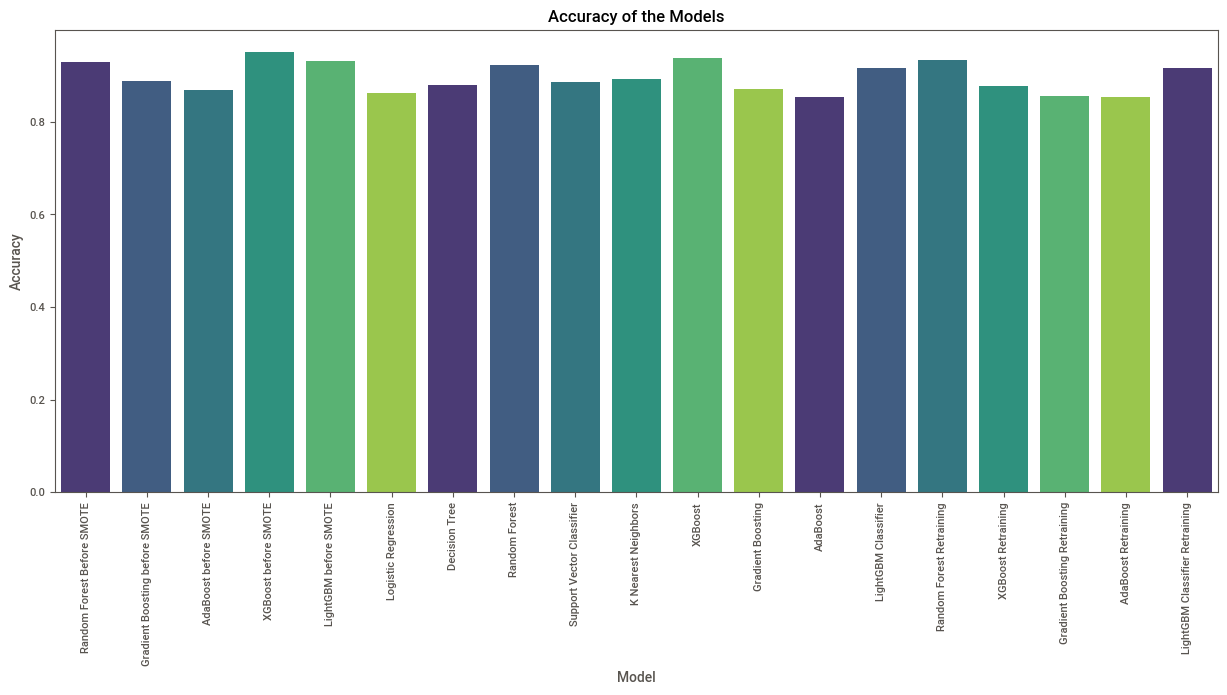

In [365]:
# plotting the accuracies using bar plot 
palette = sns.color_palette("viridis")
plt.figure(figsize=(15, 6))
sns.barplot(x='Model', y='Accuracy', data=final_results, palette=palette)
plt.xticks(rotation=90)
plt.title('Accuracy of the Models')
plt.show()

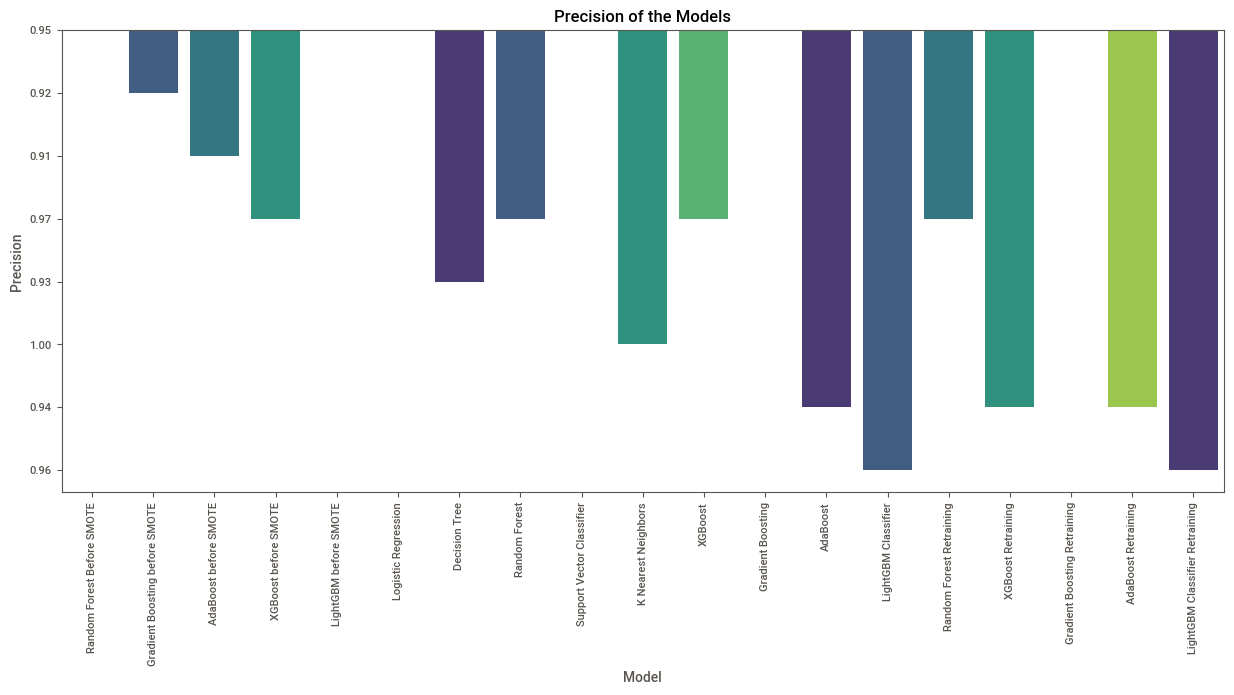

In [366]:
# plotting the precision using bar plot
palette = sns.color_palette("viridis")
plt.figure(figsize=(15,6))
sns.barplot(x='Model', y='Precision', data=final_results, palette=palette)
plt.xticks(rotation=90)
plt.title('Precision of the Models')
plt.show()

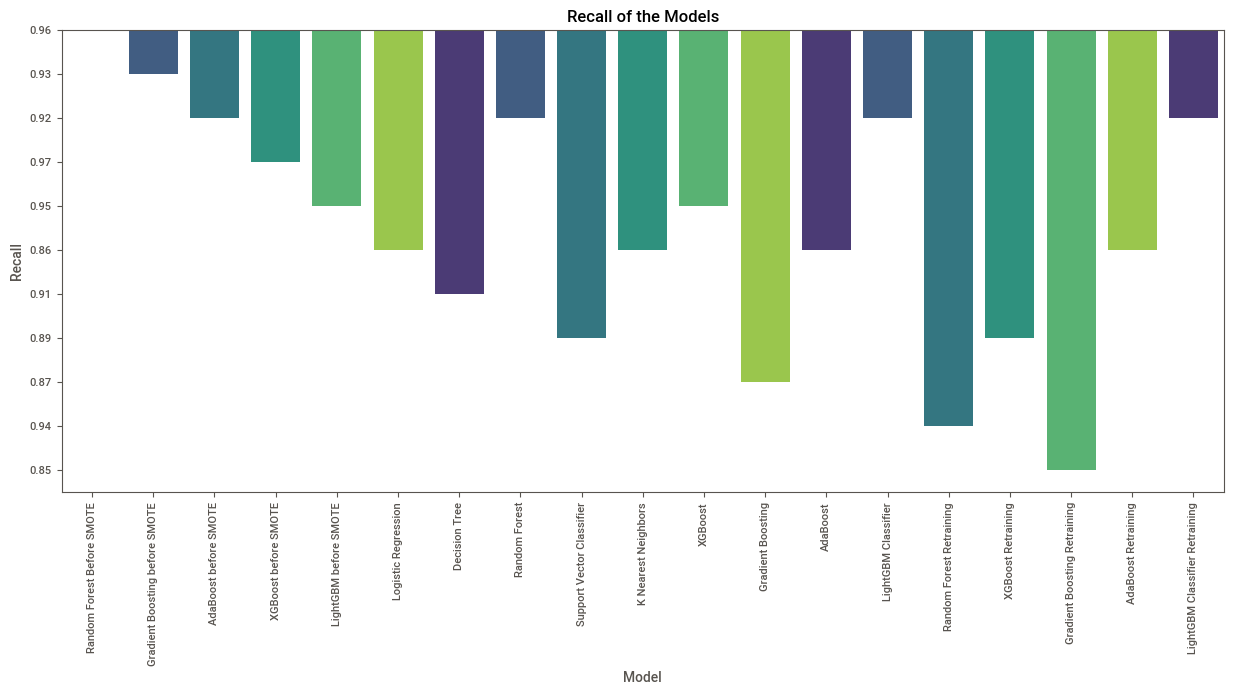

In [367]:
# plotting the recall using bar plot
palette = sns.color_palette("viridis")
plt.figure(figsize=(15, 6))
sns.barplot(x='Model', y='Recall', data=final_results, palette=palette)
plt.xticks(rotation=90)
plt.title('Recall of the Models')
plt.show()

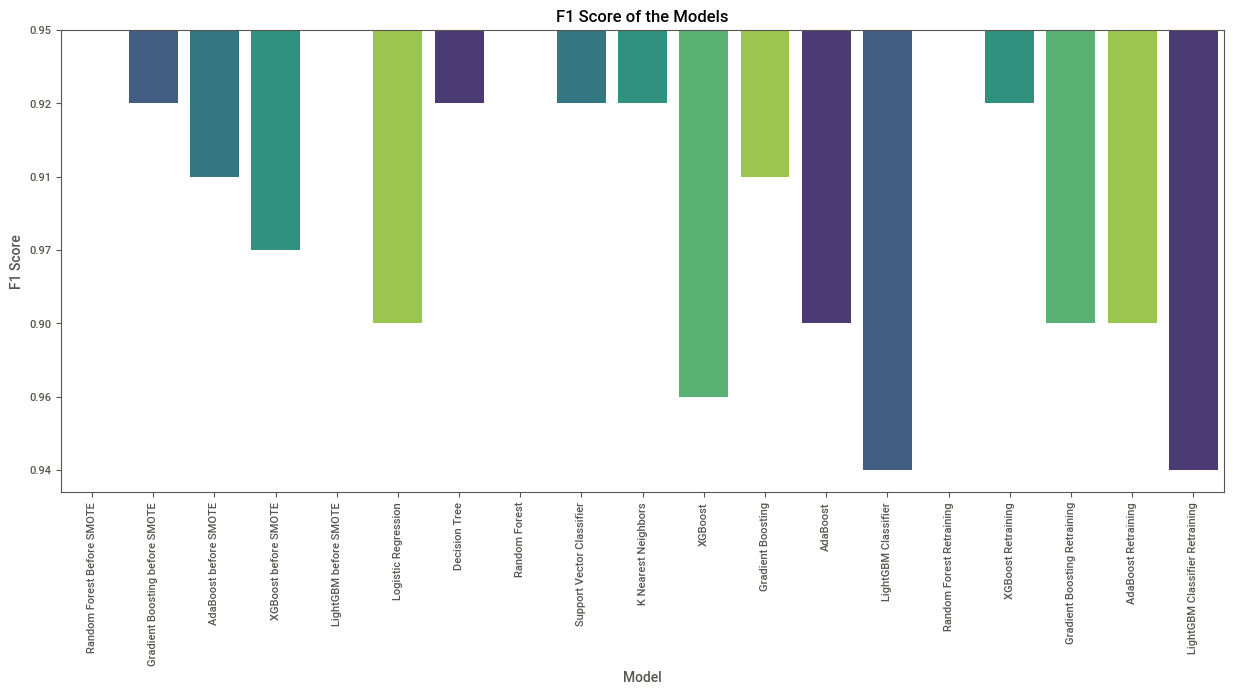

In [368]:
# plotting the f1 score using bar plot
palette = sns.color_palette("viridis")
plt.figure(figsize=(15, 6))
sns.barplot(x='Model', y='F1 Score', data=final_results, palette=palette)
plt.xticks(rotation=90)
plt.title('F1 Score of the Models')
plt.show()

### Cross Validation to check for overfitting

In [369]:
# performing cross validation on the random forest model
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier()
scores = cross_val_score(rf, x, y, cv=5, scoring='accuracy')
print('Cross Validation Scores: ', scores)
print('Mean Accuracy: ', scores.mean())

Cross Validation Scores:  [0.8747 0.8542 0.8637 0.8566 0.8526]
Mean Accuracy:  0.86036


In [370]:
# performing cross validation on the xgboost model
xgb = XGBClassifier()
scores = cross_val_score(xgb, x, y, cv=5, scoring='accuracy')
print('Cross Validation Scores: ', scores)
print('Mean Accuracy: ', scores.mean())

Cross Validation Scores:  [0.8604 0.8521 0.8646 0.858  0.8475]
Mean Accuracy:  0.85652


In [371]:
# performing cross validation on the gradient boosting model
gb = GradientBoostingClassifier()
scores = cross_val_score(gb, x, y, cv=5, scoring='accuracy')
print('Cross Validation Scores: ', scores)

Cross Validation Scores:  [0.8777 0.8595 0.8691 0.8607 0.8531]


In [372]:
# performing cross validation on the adaboost model
ab = AdaBoostClassifier()
scores = cross_val_score(ab, x, y, cv=5, scoring='accuracy')
print('Cross Validation Scores: ', scores)

Cross Validation Scores:  [0.8615 0.8511 0.861  0.8596 0.8475]


In [373]:
# performing cross validation on the lightgbm model
lgbm = LGBMClassifier()
scores = cross_val_score(lgbm, x, y, cv=5, scoring='accuracy')
print('Cross Validation Scores: ', scores)

[LightGBM] [Info] Number of positive: 10361, number of negative: 29639
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018151 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 40125
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 569
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.259025 -> initscore=-1.051042
[LightGBM] [Info] Start training from score -1.051042
[LightGBM] [Info] Number of positive: 10361, number of negative: 29639
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018303 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 40125
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 569
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.259025 -> initscore=-1.051042
[LightGBM] [Info] Start training from score -1.051042
[LightGB

Since the cross- validation scores are similar for all the models, it can be said that they are not overfitting.

In [415]:
# saving the cross validation results to a dataframe
models = ['Random Forest', 'XGBoost', 'Gradient Boosting', 'AdaBoost', 'LightGBM Classifier']
cross_val_1 = [0.8747, 0.8604, 0.8777, 0.8615, 0.8703]
cross_val_2 = [0.8542, 0.8521, 0.8595, 0.8511, 0.8610]
cross_val_3 = [0.8637, 0.8646, 0.8691, 0.861, 0.8698]
cross_val_4 = [0.8566, 0.858, 0.8607, 0.8596, 0.8585]
cross_val_5 = [0.8526, 0.8475, 0.8531, 0.8475, 0.8541]

cross_val_results = pd.DataFrame({'Model': models, 'Cross Validation 1': cross_val_1, 'Cross Validation 2': cross_val_2, 'Cross Validation 3': cross_val_3, 'Cross Validation 4': cross_val_4, 'Cross Validation 5': cross_val_5})
cross_val_results

,Model,Cross Validation 1,Cross Validation 2,Cross Validation 3,Cross Validation 4,Cross Validation 5
0,Random Forest,0.8747,0.8542,0.8637,0.8566,0.8526
1,XGBoost,0.8604,0.8521,0.8646,0.8580,0.8475
2,Gradient Boosting,0.8777,0.8595,0.8691,0.8607,0.8531
3,AdaBoost,0.8615,0.8511,0.8610,0.8596,0.8475
4,LightGBM Classifier,0.8703,0.8610,0.8698,0.8585,0.8541


## Grid Search 

Grid Search can be used to obtain the optimal hyperparameters for the algorithms.

In [374]:
# # performing grid search on the random forest model
# from sklearn.model_selection import GridSearchCV

# rf = RandomForestClassifier()
# params = {
#     'n_estimators': [50, 100, 150, 200],
#     'max_depth': [10, 20, 30, 40, 50], 
#     'min_samples_split': [2, 5, 10], 
#     'min_samples_leaf': [1, 2, 4]
# }

# grid_search = GridSearchCV(rf, param_grid=params, cv=5, scoring='accuracy')
# grid_search.fit(x, y)

In [375]:
# # displaying the best parameters
# # print('Best Parameters: ', grid_search.best_params_)
# print('CV Results: ', grid_search.cv_results_)

## Generating New Predictions

In [396]:
# reading the test data into a dataframe
test_df = pd.read_csv('test_data.csv', nrows=50000)
test_df

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,D_49,B_6,B_7,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,D_53,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,D_56,B_13,R_5,D_58,S_9,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_63,D_64,D_65,B_16,B_17,B_18,B_19,D_66,B_20,D_68,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,D_73,P_4,D_74,D_75,D_76,B_24,R_7,D_77,B_25,B_26,D_78,D_79,R_8,R_9,S_16,D_80,R_10,R_11,B_27,D_81,D_82,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_29,B_30,S_18,D_86,D_87,R_17,R_18,D_88,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_105,D_106,D_107,B_36,B_37,R_26,R_27,B_38,D_108,D_109,D_110,D_111,B_39,D_112,B_40,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,B_42,D_130,D_131,D_132,D_133,R_28,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,00000469ba478561f23a92a868bd366de6f6527a684c9a...,2019-02-19,0.631315,0.001912,0.010728,0.814497,0.007547,0.168651,0.009971,0.002347,0.113189,NaN,0.007584,0.116402,0.004483,0.009517,0.005178,NaN,0.474383,0.626467,NaN,0.174591,1.250677,1.003925,NaN,0.008718,0.001013,0.103590,0.119043,NaN,-0.002919,NaN,0.002771,0.004416,1.006875,1.005069,0.002810,0.105587,0.119198,0.321676,0.114564,NaN,NaN,0.003420,0.205898,NaN,0.010182,NaN,0.027472,0.588734,0.010489,1.881856,0.051811,CR,NaN,0.008294,0.008663,NaN,0.592103,0.009144,NaN,0.004986,NaN,0.190516,0.002675,0.409411,0.009990,NaN,0.005210,NaN,0.014684,0.004310,0.400602,1.134792,0.178862,0.959531,0.217694,0.204590,NaN,0.009799,0.007748,0.002916,0.006896,0.001656,0.004356,NaN,0.002008,NaN,0.002531,0.000348,0.001173,0.004170,0.004585,0.002291,0.508240,0.005093,1.002944,0.133804,0.004322,NaN,0.008857,0.004144,0.009563,0.006942,NaN,0.0,0.003684,0.009909,NaN,0.008908,0.002955,NaN,1,0.008999,0.003418,0.002200,0.003781,0.002948,0.004635,1.003810,0.006653,0.007474,0.000192,NaN,0.008761,0.000835,0.004389,0.004115,0.008442,0.009575,0.981078,0.134916,0.954664,0.971086,0.006562,0.002419,NaN,NaN,NaN,NaN,NaN,0.008146,0.007970,NaN,NaN,1.0,NaN,0.005124,NaN,NaN,NaN,1.004130,0.274203,0.004302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.006201,NaN,NaN,0.009664,NaN,NaN,NaN,NaN,0.007082,0.005957,NaN,NaN,NaN,NaN,NaN,NaN,0.004669,NaN,NaN,NaN,0.008281,NaN
1,00000469ba478561f23a92a868bd366de6f6527a684c9a...,2019-03-25,0.587042,0.005275,0.011026,0.810848,0.001817,0.241389,0.000166,0.009132,0.123035,NaN,0.006646,0.134878,0.009497,0.026313,0.009029,NaN,0.473587,0.611682,NaN,0.177115,0.234169,1.009301,NaN,0.003146,0.005533,0.101239,0.120991,NaN,0.031222,NaN,0.006497,0.010003,1.005728,1.000432,0.000525,0.160562,0.121490,0.170728,0.184116,NaN,0.028347,0.007156,0.403270,0.014491,0.025130,NaN,0.054790,0.622886,0.021704,2.043278,0.057567,CR,NaN,0.002011,0.000835,NaN,0.590922,0.000165,NaN,0.001557,NaN,0.190172,0.001771,0.561424,0.008125,NaN,0.008394,0.000606,0.011945,0.002283,0.605887,0.208381,0.179502,0.961667,0.216526,0.206570,NaN,0.004549,0.003098,NaN,0.003682,0.005516,0.001506,0.001013,0.006444,NaN,0.007169,0.003077,0.005880,0.004056,0.009634,0.001225,0.508681,0.007319,1.003831,0.144626,0.005300,NaN,0.001477,0.002083,0.002234,0.005523,NaN,0.0,0.006410,0.007458,NaN,0.000843,0.007457,NaN,1,0.005120,0.002382,0.006557,0.001691,0.004449,0.000574,1.004629,0.004394,0.001169,0.006693,NaN,0.004318,0.008072,0.007888,0.007656,0.006347,0.006952,0.966995,0.138531,0.957019,0.975003,0.004611,0.006549,0.003031,0.008755,NaN,NaN,0.004698,0.000078,0.015463,NaN,1.007666,1.0,NaN,0.000610,NaN,NaN,NaN,1.004495,0.353639,0.276623,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.003833,0.008782,0.005579,0.007441,NaN,0.007598,0.008074,NaN,0.007188,0.001253,NaN,NaN,NaN,NaN,NaN,0.000142,0.004940,0.009021,NaN,0.003695,0.003753,0.001460
2,00000469ba478561f23a92a868bd366de6f6527a684c9a...,2019-04-25,0.609056,0.003326,0.016390,1.004620,0.000114,0.266976,0.004196,0.004192,0

In [397]:
test_df.dtypes

customer_ID     object
S_2             object
P_2            float64
D_39           float64
B_1            float64
                ...   
D_141          float64
D_142          float64
D_143          float64
D_144          float64
D_145          float64
Length: 190, dtype: object

In [398]:
test_df.isnull().sum()

customer_ID        0
S_2                0
P_2              251
D_39               0
B_1                0
               ...  
D_141            440
D_142          40911
D_143            440
D_144            116
D_145            440
Length: 190, dtype: int64

In [399]:
# dropping the columns with more than 75% missing values
excess = test_df.isnull().mean() > 0.75
test_df.drop(test_df.columns[excess], axis=1, inplace=True)
test_df.shape

(50000, 167)

In [400]:
test_df

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,B_6,B_7,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,D_53,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,D_56,B_13,R_5,D_58,S_9,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_63,D_64,D_65,B_16,B_17,B_18,B_19,B_20,D_68,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,P_4,D_74,D_75,B_24,R_7,D_77,B_25,B_26,D_78,D_79,R_8,S_16,D_80,R_10,R_11,B_27,D_81,D_82,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_30,S_18,D_86,R_17,R_18,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_105,D_107,B_36,B_37,R_27,B_38,D_109,D_112,B_40,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,D_130,D_131,D_133,R_28,D_139,D_140,D_141,D_143,D_144,D_145
0,00000469ba478561f23a92a868bd366de6f6527a684c9a...,2019-02-19,0.631315,0.001912,0.010728,0.814497,0.007547,0.168651,0.009971,0.002347,NaN,0.007584,0.116402,0.004483,0.009517,0.005178,NaN,0.474383,0.626467,0.174591,1.250677,1.003925,NaN,0.008718,0.001013,0.103590,0.119043,NaN,-0.002919,NaN,0.002771,0.004416,1.006875,1.005069,0.002810,0.105587,0.119198,0.321676,0.114564,NaN,NaN,0.003420,0.205898,NaN,0.010182,NaN,0.027472,0.588734,0.010489,1.881856,0.051811,CR,NaN,0.008294,0.008663,NaN,0.592103,0.009144,0.004986,NaN,0.190516,0.002675,0.409411,0.009990,NaN,0.005210,NaN,0.014684,0.004310,0.400602,1.134792,0.959531,0.217694,0.204590,0.009799,0.007748,0.002916,0.006896,0.001656,0.004356,NaN,0.002008,0.002531,0.000348,0.001173,0.004170,0.004585,0.002291,0.508240,0.005093,1.002944,0.133804,0.004322,NaN,0.008857,0.004144,0.009563,0.006942,0.0,0.003684,0.009909,0.008908,0.002955,1,0.008999,0.003418,0.002200,0.003781,0.002948,0.004635,1.003810,0.006653,0.007474,0.000192,NaN,0.008761,0.000835,0.004389,0.004115,0.008442,0.009575,0.981078,0.134916,0.954664,0.971086,0.006562,0.002419,NaN,NaN,NaN,NaN,0.008146,0.007970,NaN,1.0,0.005124,1.004130,0.274203,0.004302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.006201,NaN,NaN,0.009664,NaN,NaN,0.007082,0.005957,NaN,0.004669,NaN,NaN,0.008281,NaN
1,00000469ba478561f23a92a868bd366de6f6527a684c9a...,2019-03-25,0.587042,0.005275,0.011026,0.810848,0.001817,0.241389,0.000166,0.009132,NaN,0.006646,0.134878,0.009497,0.026313,0.009029,NaN,0.473587,0.611682,0.177115,0.234169,1.009301,NaN,0.003146,0.005533,0.101239,0.120991,NaN,0.031222,NaN,0.006497,0.010003,1.005728,1.000432,0.000525,0.160562,0.121490,0.170728,0.184116,NaN,0.028347,0.007156,0.403270,0.014491,0.025130,NaN,0.054790,0.622886,0.021704,2.043278,0.057567,CR,NaN,0.002011,0.000835,NaN,0.590922,0.000165,0.001557,NaN,0.190172,0.001771,0.561424,0.008125,NaN,0.008394,0.000606,0.011945,0.002283,0.605887,0.208381,0.961667,0.216526,0.206570,0.004549,0.003098,NaN,0.003682,0.005516,0.001506,0.001013,0.006444,0.007169,0.003077,0.005880,0.004056,0.009634,0.001225,0.508681,0.007319,1.003831,0.144626,0.005300,NaN,0.001477,0.002083,0.002234,0.005523,0.0,0.006410,0.007458,0.000843,0.007457,1,0.005120,0.002382,0.006557,0.001691,0.004449,0.000574,1.004629,0.004394,0.001169,0.006693,NaN,0.004318,0.008072,0.007888,0.007656,0.006347,0.006952,0.966995,0.138531,0.957019,0.975003,0.004611,0.006549,0.003031,0.008755,NaN,0.004698,0.000078,0.015463,1.007666,1.0,0.000610,1.004495,0.353639,0.276623,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.003833,0.008782,0.005579,0.007441,0.007598,0.008074,0.007188,0.001253,0.000142,0.004940,0.009021,0.003695,0.003753,0.001460
2,00000469ba478561f23a92a868bd366de6f6527a684c9a...,2019-04-25,0.609056,0.003326,0.016390,1.004620,0.000114,0.266976,0.004196,0.004192,NaN,0.009606,0.136109,0.007020,0.060017,0.008286,NaN,0.471837,0.622228,1.417059,0.126995,1.004635,NaN,0.006082,0.000023,0.108955,0.113107,NaN,0.035532,NaN,0.003407,0.004140,0.006408,1.007979,0.004876,0.210077,0.120145,0.172760,0.253969,NaN,0.033726,0.006025,0.393717,0.022947,0.028865,0.423664,0.083740,0.617996,0.039339,1.641889,

In [401]:
# dropping the columns which are not required
test_df = test_df.drop_duplicates() # dropping the duplicate rows
test_df.shape

(50000, 167)

In [402]:
# defining features and the target column
x = df.drop(['customer_ID', 'target'], axis=1) # defining the features
y = df['target']

In [403]:
rf.fit(x, y)
predictions_rf = rf.predict(x)
accuracy_rf = accuracy_score(y, predictions_rf)

xgb.fit(x, y)
predictions_xgb = xgb.predict(x)
accuracy_xgb = accuracy_score(y, predictions_xgb)

gb.fit(x, y)
predictions_gb = gb.predict(x)
accuracy_gb = accuracy_score(y, predictions_gb)

ab.fit(x, y)
predictions_ab = ab.predict(x)
accuracy_ab = accuracy_score(y, predictions_ab)

lgbm.fit(x, y)
predictions_lgbm = lgbm.predict(x)
accuracy_lgbm = accuracy_score(y, predictions_lgbm)

print('Accuracy of Random Forest model: ', accuracy_rf)
print('Accuracy of XGBoost model: ', accuracy_xgb)
print('Accuracy of Gradient Boosting model: ', accuracy_gb)
print('Accuracy of AdaBoost model: ', accuracy_ab)
print('Accuracy of LightGBM model: ', accuracy_lgbm)

[LightGBM] [Info] Number of positive: 12951, number of negative: 37049
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018397 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 40127
[LightGBM] [Info] Number of data points in the train set: 50000, number of used features: 569
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.259020 -> initscore=-1.051068
[LightGBM] [Info] Start training from score -1.051068
Accuracy of Random Forest model:  1.0
Accuracy of XGBoost model:  0.99514
Accuracy of Gradient Boosting model:  0.89394
Accuracy of AdaBoost model:  0.86984
Accuracy of LightGBM model:  0.95604


In [404]:
# printing classification report for the random forest model
print('Classification Report for Random Forest model: ')
print(classification_report(y, predictions_rf))

Classification Report for Random Forest model: 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     37049
         1.0       1.00      1.00      1.00     12951

    accuracy                           1.00     50000
   macro avg       1.00      1.00      1.00     50000
weighted avg       1.00      1.00      1.00     50000



In [405]:
print('Classification Report for XGBoost model: ')
print(classification_report(y, predictions_xgb))

Classification Report for XGBoost model: 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     37049
         1.0       0.99      0.99      0.99     12951

    accuracy                           1.00     50000
   macro avg       0.99      0.99      0.99     50000
weighted avg       1.00      1.00      1.00     50000



In [406]:
print('Classification Report for Gradient Boosting model: ')
print(classification_report(y, predictions_gb))

Classification Report for Gradient Boosting model: 
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93     37049
         1.0       0.80      0.79      0.79     12951

    accuracy                           0.89     50000
   macro avg       0.86      0.86      0.86     50000
weighted avg       0.89      0.89      0.89     50000



In [407]:
print('Classification Report for AdaBoost model: ')
print(classification_report(y, predictions_ab))

Classification Report for AdaBoost model: 
              precision    recall  f1-score   support

         0.0       0.91      0.92      0.91     37049
         1.0       0.76      0.74      0.75     12951

    accuracy                           0.87     50000
   macro avg       0.83      0.83      0.83     50000
weighted avg       0.87      0.87      0.87     50000



In [408]:
print('Classification Report for LightGBM model: ')
print(classification_report(y, predictions_lgbm))

Classification Report for LightGBM model: 
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97     37049
         1.0       0.91      0.92      0.92     12951

    accuracy                           0.96     50000
   macro avg       0.94      0.94      0.94     50000
weighted avg       0.96      0.96      0.96     50000



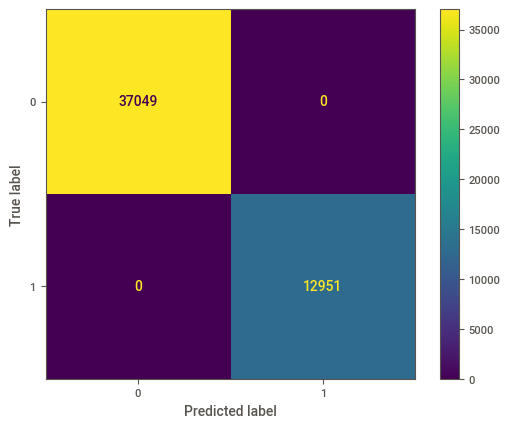

In [409]:
# drawing a confusion matrix for the random forest model
rf_confusion_matrix = confusion_matrix(y, predictions_rf)
ConfusionMatrixDisplay(rf_confusion_matrix).plot()

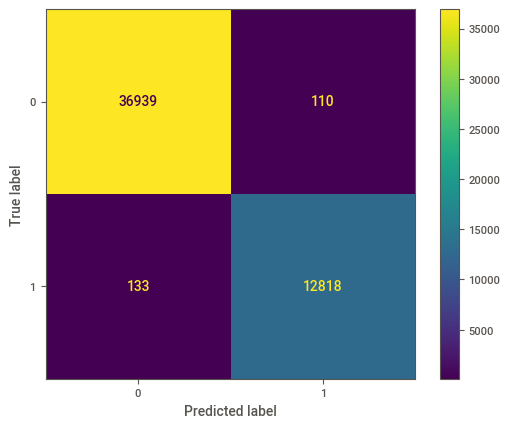

In [410]:
xgb_confusion_matrix = confusion_matrix(y, predictions_xgb)
ConfusionMatrixDisplay(xgb_confusion_matrix).plot()

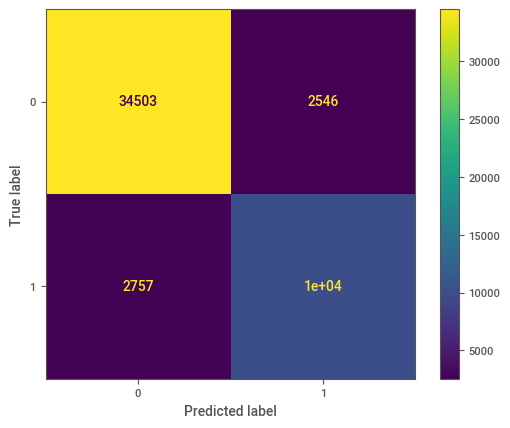

In [411]:
gb_confusion_matrix = confusion_matrix(y, predictions_gb)
ConfusionMatrixDisplay(gb_confusion_matrix).plot()

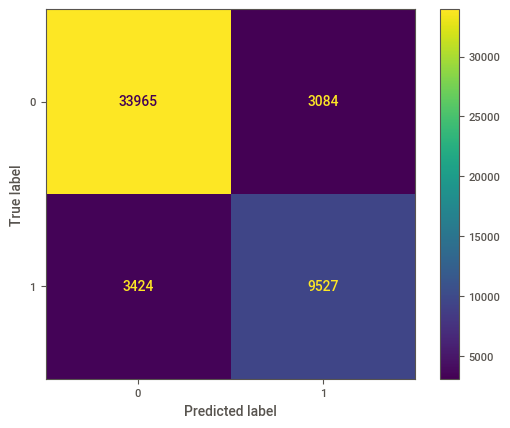

In [412]:
ab_confusion_matrix = confusion_matrix(y, predictions_ab)
ConfusionMatrixDisplay(ab_confusion_matrix).plot()

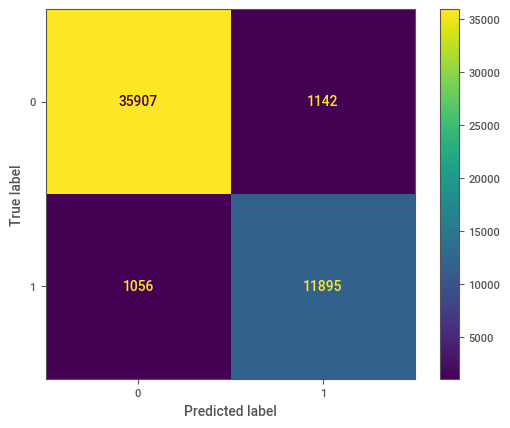

In [413]:
lgbm_confusion_matrix = confusion_matrix(y, predictions_lgbm)
ConfusionMatrixDisplay(lgbm_confusion_matrix).plot()

In [414]:
# adding the results to a new dataframe
accuracies = [accuracy_rf, xgb_accuracy, gb_accuracy, ab_accuracy, lgbm_accuracy]
precision = [classification_report(y, predictions_rf).split()[5], classification_report(y, predictions_xgb).split()[5], classification_report(y, predictions_gb).split()[5], classification_report(y, predictions_ab).split()[5], classification_report(y, predictions_lgbm).split()[5]]
recall = [classification_report(y, predictions_rf).split()[6], classification_report(y, predictions_xgb).split()[6], classification_report(y, predictions_gb).split()[6], classification_report(y, predictions_ab).split()[6], classification_report(y, predictions_lgbm).split()[6]]
f1_score = [classification_report(y, predictions_rf).split()[7], classification_report(y, predictions_xgb).split()[7], classification_report(y, predictions_gb).split()[7], classification_report(y, predictions_ab).split()[7], classification_report(y, predictions_lgbm).split()[7]]
models = ['Random Forest', 'XGBoost', 'Gradient Boosting', 'AdaBoost', 'LightGBM Classifier']

test_results = pd.DataFrame({'Model': models, 'Accuracy': accuracies, 'Precision': precision, 'Recall': recall, 'F1 Score': f1_score})
test_results

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,1.0000,1.00,1.00,1.00
1,XGBoost,0.9382,1.00,1.00,1.00
2,Gradient Boosting,0.8704,0.93,0.93,0.93
3,AdaBoost,0.8529,0.91,0.92,0.91
4,LightGBM Classifier,0.9169,0.97,0.97,0.97


## Final Insights

It is noticeable that the accuracies of all the models increase when the SMOTE technique is not performed.
This could be possible because of the following reasons.
1. When SMOTE oversamples with synthetic samples, the quality of these newly generated samples may not be of good quality as the existing samples which can cause a decrease in the quality fo the data.
2. SMOTE can cause introduction of noise. This can occur if the nearest samples are not actually similar. This causes the generated samples to be less meaningful.
3. The synthetic data in SMOTE may lead to overfitting as the model may tend to memorize patterns in the synthetic data.

It is noticeable that the accuracy and the performance of the model tends to drop when the features are dropped based on feature importance. This may occur due to the following reasons.

1. Data Points- Some features which may seem to be less important for other data points may be essential for the particular data points in the test data.
2. Relation between other features- Some features might not be important on their own but may be essential along with other factors.
3. Model Overfitting- removing features may tend to oversimplify the model which may not work well with algorithms like Random Forest and Gradient Boosting as these models are complex by nature.

When the models were trained without the conversion of outliers to null values and imputed, the results were varied. 
Some models returned better metrics, while some performed poor comparatively.
1. Outlier sensitive models- Logistic Regression can be affected as it tries to minimize a cost function. Also models like K-Nearest Neighbours are affected as the measures of distance will be skewed due to the outliers.
2. Less Sensitive models- Tree based models such as bagging and boosting algorithms are not affected as much by outliers as they split the data into segments so they are not affected by extreme values.